# Importing modules


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display
from scipy import stats as sc
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
Pth = os.path.abspath(os.getcwd())
sys.path.insert(1, Pth+'/functions')
from ErrorBarsForMeans import *
from ScatterPlot import *
figpath = Pth+"/plots/"
filepath = Pth+"/data/"

# Load Data

In [2]:
data_main = pd.read_csv(filepath+'/exp1_main.csv',dtype=float)
data_main_fam = pd.read_csv(filepath+'/exp1_main_familiarity.csv', dtype=float)
data_rep = pd.read_csv(filepath+'/exp1_rep.csv',dtype=float)
data_rep_fam = pd.read_csv(filepath+'/exp1_rep_familiarity.csv', dtype=float)
data_cont = pd.read_csv(filepath+'/exp1_control.csv',dtype=float)
print '##########################################################################'
print '\nData shape (rows, columns):', data_main.shape
display (data_main.head())
print '##########################################################################'
print '\nData shape (rows, columns):', data_main_fam.shape
display (data_main_fam.head())
print '##########################################################################'
print '\nData shape (rows, columns):', data_rep.shape
display (data_rep.head())
print '##########################################################################'
print '\nData shape (rows, columns):', data_rep_fam.shape
display (data_rep_fam.head())
print '##########################################################################'
print '\nData shape (rows, columns):', data_cont.shape
display (data_cont.head())

##########################################################################

Data shape (rows, columns): (17280, 8)


,name,rt,error,correct_key,trial,pair1,pair2,trial_types
0,1.0,3.160520,1.0,1.0,76.0,4.0,10.0,2.0
1,1.0,1.138024,1.0,2.0,18.0,1.0,10.0,2.0
2,1.0,1.357115,0.0,2.0,78.0,4.0,10.0,8.0
3,1.0,0.803233,0.0,2.0,117.0,2.0,1.0,6.0
4,1.0,1.682645,1.0,2.0,140.0,4.0,3.0,5.0


##########################################################################

Data shape (rows, columns): (240, 7)


,name,rt,pair,foil,trial,error,first_press
0,1.0,1.542519,2.0,2.0,4.0,1.0,1.0
1,1.0,1.243490,1.0,1.0,1.0,0.0,1.0
2,1.0,5.705495,2.0,1.0,3.0,0.0,1.0
3,1.0,1.318260,2.0,1.0,7.0,0.0,2.0
4,1.0,1.363908,1.0,2.0,2.0,1.0,1.0


##########################################################################

Data shape (rows, columns): (8928, 8)


,name,rt,error,correct_key,trial,pair1,pair2,trial_types
0,1.0,2.056522,1.0,3.0,31.0,2.0,11.0,3.0
1,1.0,3.059444,0.0,2.0,12.0,1.0,12.0,2.0
2,1.0,1.958117,0.0,3.0,139.0,4.0,3.0,7.0
3,1.0,2.382799,0.0,1.0,59.0,3.0,12.0,2.0
4,1.0,1.132924,0.0,1.0,113.0,2.0,1.0,5.0


##########################################################################

Data shape (rows, columns): (248, 7)


,name,rt,pair,foil,trial,error,first_press
0,1.0,2.781870,2.0,2.0,4.0,1.0,1.0
1,1.0,1.585620,1.0,1.0,5.0,1.0,2.0
2,1.0,1.534808,2.0,2.0,8.0,0.0,2.0
3,1.0,2.127029,1.0,2.0,2.0,1.0,1.0
4,1.0,1.788971,1.0,1.0,1.0,0.0,1.0


##########################################################################

Data shape (rows, columns): (11520, 8)


,name,rt,error,correct_key,trial,pair1,pair2,trial_types
0,1.0,1.651323,0.0,2.0,76.0,4.0,10.0,1.0
1,1.0,2.245259,0.0,2.0,129.0,3.0,4.0,5.0
2,1.0,1.589527,0.0,3.0,83.0,4.0,12.0,4.0
3,1.0,0.651460,0.0,2.0,9.0,1.0,11.0,2.0
4,1.0,2.065465,0.0,2.0,40.0,2.0,10.0,2.0


## Splitting data into Blocks

In [3]:
data = [data_main,data_rep,data_cont]
d_label = ["Main","Replication","Control"]
NumSplit = [4.0, 2.0, 4.0]
d_main_rt = [pd.DataFrame(columns=data_main.columns) for i in range(4)]
d_rep_rt = [pd.DataFrame(columns=data_rep.columns) for i in range(2)]
d_cont_rt = [pd.DataFrame(columns=data_cont.columns) for i in range(4)]
d_main_err = [pd.DataFrame(columns=data_main.columns) for i in range(4)]
d_rep_err = [pd.DataFrame(columns=data_rep.columns) for i in range(2)]
d_cont_err = [pd.DataFrame(columns=data_cont.columns) for i in range(4)]
data_RT_err = [[d_main_rt, d_rep_rt, d_cont_rt], [d_main_err, d_rep_err, d_cont_err]]
data_fam = [data_main_fam, data_rep_fam]
behave_type = ["RT", "Error"]

for i in range(len(data_RT_err)):
    for di,d in enumerate(data):
        
        #excluding explicit learner
        if di==1:
            d = d[~d['name'].isin([10])]
            data_fam[1] = data_rep_fam[~data_rep_fam['name'].isin([10])]
        # getting the participants'names
        names = np.unique(d['name'])
        n = len(names)
        print d_label[di]
        print names
        print n

        for name in names:
    
            # the RT data and the error
            subD = d[d['name'].isin([name])]
            print name
            print 'Data: ', subD.shape
    
            subD1 = subD[subD.index < round(subD.index[0]+subD.shape[0]/NumSplit[di])]
            frames = [data_RT_err[i][di][0], subD1]
            data_RT_err[i][di][0] = pd.concat(frames)
            
            if di==1:
                subD2 = subD[subD.index >= round(subD.index[0]+subD.shape[0]/NumSplit[di])]
                frames = [data_RT_err[i][di][1], subD2]
                data_RT_err[i][di][1] = pd.concat(frames)
                
                print behave_type[i], subD1.shape
                print behave_type[i], subD2.shape
                print behave_type[i], data_RT_err[i][di][0].shape
                print behave_type[i], data_RT_err[i][di][1].shape
                
            else:
                subD2 = subD[(subD.index >= round(subD.index[0]+subD.shape[0]/NumSplit[di])) & (subD.index < round(subD.index[0]+2*subD.shape[0]/NumSplit[di]))]
                frames = [data_RT_err[i][di][1], subD2]
                data_RT_err[i][di][1] = pd.concat(frames)

                subD3 = subD[(subD.index >= round(subD.index[0]+2*subD.shape[0]/NumSplit[di])) & (subD.index < round(subD.index[0]+3*subD.shape[0]/NumSplit[di]))]
                frames = [data_RT_err[i][di][2], subD3]
                data_RT_err[i][di][2] = pd.concat(frames)

                subD4 = subD[subD.index >= round(subD.index[0]+3*subD.shape[0]/NumSplit[di])]
                frames = [data_RT_err[i][di][3], subD4]
                data_RT_err[i][di][3] = pd.concat(frames)
                
                print behave_type[i], subD1.shape
                print behave_type[i], subD2.shape
                print behave_type[i], subD3.shape
                print behave_type[i], subD4.shape
                
                print behave_type[i], data_RT_err[i][di][0].shape
                print behave_type[i], data_RT_err[i][di][1].shape
                print behave_type[i], data_RT_err[i][di][2].shape
                print behave_type[i], data_RT_err[i][di][3].shape
                

Main
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
30
1.0
Data:  (576, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
2.0
Data:  (576, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (288, 8)
RT (288, 8)
RT (288, 8)
RT (288, 8)
3.0
Data:  (576, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (432, 8)
RT (432, 8)
RT (432, 8)
RT (432, 8)
4.0
Data:  (576, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (576, 8)
RT (576, 8)
RT (576, 8)
RT (576, 8)
5.0
Data:  (576, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (720, 8)
RT (720, 8)
RT (720, 8)
RT (720, 8)
6.0
Data:  (576, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (864, 8)
RT (864, 8)
RT (864, 8)
RT (864, 8)
7.0
Data:  (576, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (144, 8)
RT (1008, 8)
RT (1008, 8)
RT (1008, 8)
RT (1008, 8)
8.0
Data:  (576, 8)
RT (144, 8)
RT (144, 8)
RT (144, 

Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (1296, 8)
Error (1296, 8)
Error (1296, 8)
Error (1296, 8)
10.0
Data:  (576, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (1440, 8)
Error (1440, 8)
Error (1440, 8)
Error (1440, 8)
11.0
Data:  (576, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (1584, 8)
Error (1584, 8)
Error (1584, 8)
Error (1584, 8)
12.0
Data:  (576, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (1728, 8)
Error (1728, 8)
Error (1728, 8)
Error (1728, 8)
13.0
Data:  (576, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (1872, 8)
Error (1872, 8)
Error (1872, 8)
Error (1872, 8)
14.0
Data:  (576, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (2016, 8)
Error (2016, 8)
Error (2016, 8)
Error (2016, 8)
15.0
Data:  (576, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (144, 8)
Error (2160, 8)
Error (2160, 8)
Error (2160, 8)
Error (2160, 8)
16.0
D

## Excluding trials with errors for RTs

In [4]:
for i,group in enumerate(data_RT_err[0]):
    for j,dataset in enumerate(group):
        print 'Dataset NO: ', j
        data_RT_err[0][i][j] = dataset[dataset.error != 1]
        print 'Data shape (rows, columns):', data_RT_err[0][i][j].shape

Dataset NO:  0
Data shape (rows, columns): (3078, 8)
Dataset NO:  1
Data shape (rows, columns): (3452, 8)
Dataset NO:  2
Data shape (rows, columns): (3615, 8)
Dataset NO:  3
Data shape (rows, columns): (3640, 8)
Dataset NO:  0
Data shape (rows, columns): (3518, 8)
Dataset NO:  1
Data shape (rows, columns): (3832, 8)
Dataset NO:  0
Data shape (rows, columns): (2478, 8)
Dataset NO:  1
Data shape (rows, columns): (2585, 8)
Dataset NO:  2
Data shape (rows, columns): (2543, 8)
Dataset NO:  3
Data shape (rows, columns): (2625, 8)


# Computing usefull variables from existing ones

In [5]:
for t,types in enumerate(data_RT_err):
    for g,group in enumerate(types):
        for d,dataset in enumerate(group):
    
            # object effect 
            Code = [0 if (i!=1.0 and i!=2.0 and i!=5.0 and i!=6.0) else (2.0 if (i!=1.0 and i!=5.0) else 1.0) for i in dataset['trial_types']]
            dataset = dataset.assign(Code=Code)
            data_RT_err[t][g][d] = dataset
            display(data_RT_err[t][g][d].head())

,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
2,1.0,1.357115,0.0,2.0,78.0,4.0,10.0,8.0,0.0
3,1.0,0.803233,0.0,2.0,117.0,2.0,1.0,6.0,2.0
5,1.0,0.837569,0.0,2.0,61.0,3.0,9.0,8.0,0.0
6,1.0,1.113218,0.0,1.0,143.0,4.0,3.0,6.0,2.0
7,1.0,0.903728,0.0,2.0,69.0,3.0,11.0,8.0,0.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
144,1.0,1.513699,0.0,1.0,65.0,3.0,10.0,2.0,2.0
145,1.0,0.860915,0.0,1.0,29.0,2.0,10.0,8.0,0.0
146,1.0,1.085415,0.0,2.0,18.0,1.0,10.0,2.0,2.0
147,1.0,1.388021,0.0,1.0,47.0,2.0,12.0,8.0,0.0
148,1.0,1.159286,0.0,1.0,71.0,3.0,12.0,2.0,2.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
288,1.0,1.601205,0.0,3.0,98.0,1.0,2.0,7.0,0.0
289,1.0,1.093682,0.0,2.0,68.0,3.0,11.0,1.0,1.0
290,1.0,1.057388,0.0,1.0,76.0,4.0,10.0,2.0,2.0
291,1.0,0.792679,0.0,2.0,20.0,1.0,11.0,2.0,2.0
292,1.0,1.053556,0.0,3.0,62.0,3.0,9.0,4.0,0.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
432,1.0,1.053943,0.0,2.0,54.0,3.0,10.0,8.0,0.0
433,1.0,0.728492,0.0,1.0,130.0,3.0,4.0,6.0,2.0
434,1.0,0.785871,0.0,2.0,44.0,2.0,11.0,2.0,2.0
435,1.0,1.079079,0.0,3.0,3.0,1.0,9.0,3.0,0.0
437,1.0,0.847958,0.0,2.0,105.0,1.0,2.0,6.0,2.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
1,1.0,3.059444,0.0,2.0,12.0,1.0,12.0,2.0,2.0
2,1.0,1.958117,0.0,3.0,139.0,4.0,3.0,7.0,0.0
3,1.0,2.382799,0.0,1.0,59.0,3.0,12.0,2.0,2.0
4,1.0,1.132924,0.0,1.0,113.0,2.0,1.0,5.0,1.0
5,1.0,1.208321,0.0,2.0,51.0,3.0,9.0,8.0,0.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
144,1.0,1.022029,0.0,3.0,74.0,4.0,9.0,4.0,0.0
146,1.0,0.837795,0.0,2.0,99.0,1.0,2.0,6.0,2.0
147,1.0,0.700995,0.0,2.0,96.0,4.0,12.0,1.0,1.0
148,1.0,0.538228,0.0,2.0,135.0,4.0,3.0,5.0,1.0
149,1.0,0.518446,0.0,2.0,75.0,4.0,9.0,8.0,0.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
0,1.0,1.651323,0.0,2.0,76.0,4.0,10.0,1.0,1.0
1,1.0,2.245259,0.0,2.0,129.0,3.0,4.0,5.0,1.0
2,1.0,1.589527,0.0,3.0,83.0,4.0,12.0,4.0,0.0
3,1.0,0.651460,0.0,2.0,9.0,1.0,11.0,2.0,2.0
4,1.0,2.065465,0.0,2.0,40.0,2.0,10.0,2.0,2.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
144,1.0,1.754743,0.0,2.0,21.0,1.0,11.0,2.0,2.0
145,1.0,0.786072,0.0,1.0,87.0,4.0,9.0,2.0,2.0
146,1.0,1.088231,0.0,2.0,124.0,3.0,4.0,5.0,1.0
147,1.0,0.981830,0.0,3.0,140.0,4.0,3.0,7.0,0.0
148,1.0,0.882981,0.0,3.0,44.0,2.0,11.0,3.0,0.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
288,1.0,1.255075,0.0,2.0,136.0,4.0,3.0,5.0,1.0
289,1.0,0.896456,0.0,1.0,7.0,1.0,11.0,1.0,1.0
291,1.0,1.252673,0.0,2.0,73.0,4.0,9.0,1.0,1.0
292,1.0,0.965241,0.0,3.0,96.0,4.0,12.0,4.0,0.0
294,1.0,1.305891,0.0,3.0,60.0,3.0,12.0,3.0,0.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
432,1.0,1.479234,0.0,2.0,81.0,4.0,11.0,8.0,0.0
433,1.0,0.835898,0.0,1.0,127.0,3.0,4.0,6.0,2.0
434,1.0,0.518279,0.0,2.0,142.0,4.0,3.0,5.0,1.0
436,1.0,0.654249,0.0,2.0,13.0,1.0,9.0,2.0,2.0
437,1.0,0.975656,0.0,2.0,40.0,2.0,10.0,2.0,2.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
0,1.0,3.160520,1.0,1.0,76.0,4.0,10.0,2.0,2.0
1,1.0,1.138024,1.0,2.0,18.0,1.0,10.0,2.0,2.0
2,1.0,1.357115,0.0,2.0,78.0,4.0,10.0,8.0,0.0
3,1.0,0.803233,0.0,2.0,117.0,2.0,1.0,6.0,2.0
4,1.0,1.682645,1.0,2.0,140.0,4.0,3.0,5.0,1.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
144,1.0,1.513699,0.0,1.0,65.0,3.0,10.0,2.0,2.0
145,1.0,0.860915,0.0,1.0,29.0,2.0,10.0,8.0,0.0
146,1.0,1.085415,0.0,2.0,18.0,1.0,10.0,2.0,2.0
147,1.0,1.388021,0.0,1.0,47.0,2.0,12.0,8.0,0.0
148,1.0,1.159286,0.0,1.0,71.0,3.0,12.0,2.0,2.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
288,1.0,1.601205,0.0,3.0,98.0,1.0,2.0,7.0,0.0
289,1.0,1.093682,0.0,2.0,68.0,3.0,11.0,1.0,1.0
290,1.0,1.057388,0.0,1.0,76.0,4.0,10.0,2.0,2.0
291,1.0,0.792679,0.0,2.0,20.0,1.0,11.0,2.0,2.0
292,1.0,1.053556,0.0,3.0,62.0,3.0,9.0,4.0,0.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
432,1.0,1.053943,0.0,2.0,54.0,3.0,10.0,8.0,0.0
433,1.0,0.728492,0.0,1.0,130.0,3.0,4.0,6.0,2.0
434,1.0,0.785871,0.0,2.0,44.0,2.0,11.0,2.0,2.0
435,1.0,1.079079,0.0,3.0,3.0,1.0,9.0,3.0,0.0
436,1.0,1.064940,1.0,3.0,7.0,1.0,11.0,4.0,0.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
0,1.0,2.056522,1.0,3.0,31.0,2.0,11.0,3.0,0.0
1,1.0,3.059444,0.0,2.0,12.0,1.0,12.0,2.0,2.0
2,1.0,1.958117,0.0,3.0,139.0,4.0,3.0,7.0,0.0
3,1.0,2.382799,0.0,1.0,59.0,3.0,12.0,2.0,2.0
4,1.0,1.132924,0.0,1.0,113.0,2.0,1.0,5.0,1.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
144,1.0,1.022029,0.0,3.0,74.0,4.0,9.0,4.0,0.0
145,1.0,1.580989,1.0,3.0,31.0,2.0,11.0,3.0,0.0
146,1.0,0.837795,0.0,2.0,99.0,1.0,2.0,6.0,2.0
147,1.0,0.700995,0.0,2.0,96.0,4.0,12.0,1.0,1.0
148,1.0,0.538228,0.0,2.0,135.0,4.0,3.0,5.0,1.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
0,1.0,1.651323,0.0,2.0,76.0,4.0,10.0,1.0,1.0
1,1.0,2.245259,0.0,2.0,129.0,3.0,4.0,5.0,1.0
2,1.0,1.589527,0.0,3.0,83.0,4.0,12.0,4.0,0.0
3,1.0,0.651460,0.0,2.0,9.0,1.0,11.0,2.0,2.0
4,1.0,2.065465,0.0,2.0,40.0,2.0,10.0,2.0,2.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
144,1.0,1.754743,0.0,2.0,21.0,1.0,11.0,2.0,2.0
145,1.0,0.786072,0.0,1.0,87.0,4.0,9.0,2.0,2.0
146,1.0,1.088231,0.0,2.0,124.0,3.0,4.0,5.0,1.0
147,1.0,0.981830,0.0,3.0,140.0,4.0,3.0,7.0,0.0
148,1.0,0.882981,0.0,3.0,44.0,2.0,11.0,3.0,0.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
288,1.0,1.255075,0.0,2.0,136.0,4.0,3.0,5.0,1.0
289,1.0,0.896456,0.0,1.0,7.0,1.0,11.0,1.0,1.0
290,1.0,1.443882,1.0,2.0,118.0,2.0,1.0,6.0,2.0
291,1.0,1.252673,0.0,2.0,73.0,4.0,9.0,1.0,1.0
292,1.0,0.965241,0.0,3.0,96.0,4.0,12.0,4.0,0.0


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
432,1.0,1.479234,0.0,2.0,81.0,4.0,11.0,8.0,0.0
433,1.0,0.835898,0.0,1.0,127.0,3.0,4.0,6.0,2.0
434,1.0,0.518279,0.0,2.0,142.0,4.0,3.0,5.0,1.0
435,1.0,1.683602,1.0,3.0,60.0,3.0,12.0,3.0,0.0
436,1.0,0.654249,0.0,2.0,13.0,1.0,9.0,2.0,2.0


# Performance in the 3 response types

rt

Data shape (rows, columns): (13785, 9)


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
2,1.0,1.357115,0.0,2.0,78.0,4.0,10.0,8.0,0.0
3,1.0,0.803233,0.0,2.0,117.0,2.0,1.0,6.0,2.0
5,1.0,0.837569,0.0,2.0,61.0,3.0,9.0,8.0,0.0
6,1.0,1.113218,0.0,1.0,143.0,4.0,3.0,6.0,2.0
7,1.0,0.903728,0.0,2.0,69.0,3.0,11.0,8.0,0.0


median                    
                   rt                    
correct_key       1.0       2.0       3.0
name                                     
1.0          0.981907  0.825082  1.153245
2.0          1.091204  0.930891  1.204530
3.0          1.173828  0.942273  1.424445
4.0          1.406249  1.127859  1.158488
5.0          1.014295  0.923284  1.262031
6.0          1.119968  1.046041  1.066176
7.0          1.082684  0.976885  1.488041
8.0          1.299819  1.260589  1.319555
9.0          1.020590  0.909965  1.149176
10.0         0.886623  0.839183  1.062513
11.0         0.729604  0.693914  0.766410
12.0         0.895250  0.934430  1.248138
13.0         1.082974  0.871041  1.216005
14.0         0.991667  0.955517  1.064963
15.0         1.323220  1.320717  1.472663
16.0         1.109134  1.030004  1.142679
17.0         1.373986  1.131623  1.164483
18.0         1.169894  1.081481  1.328436
19.0         1.159629  1.165550  1.158514
20.0         0.824739  0.828118  1.046054
21.0         1.137538  1.224723  1.139792
22.0         1.283240  1.355218  1.139095
23.0         0.997835  1.094818  1.113993
24.0         1.059112  0.992635  1.133301
25.0         0.921468  0.824781  1.038114
26.0         1.171162  1.045756  0.985078
27.0         0.914586  0.992262  0.980973
28.0         2.272983  2.224518  1.448637
29.0         1.250502  1.246165  1.425231
30.0         1.212062  0.862026  1.176855

mean rt: 1.13192505 1.055245
T test for comparing 0  to  1  in rt: Ttest_relResult(statistic=3.8203170165509355, pvalue=0.0006501863352823481)  Cohen'd: -0.7094150603319718
mean rt: 1.13192505 1.1825871499999998
T test for comparing 0  to  2  in rt: Ttest_relResult(statistic=-1.2367083057407724, pvalue=0.2261175832408448)  Cohen'd: 0.22965096706090157
mean rt: 1.055245 1.1825871499999998
T test for comparing 1  to  2  in rt: Ttest_relResult(statistic=-2.9213065186372265, pvalue=0.006685655921742096)  Cohen'd: 0.5424730018971659

Data shape (rows, columns): (7350, 9)


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
1,1.0,3.059444,0.0,2.0,12.0,1.0,12.0,2.0,2.0
2,1.0,1.958117,0.0,3.0,139.0,4.0,3.0,7.0,0.0
3,1.0,2.382799,0.0,1.0,59.0,3.0,12.0,2.0,2.0
4,1.0,1.132924,0.0,1.0,113.0,2.0,1.0,5.0,1.0
5,1.0,1.208321,0.0,2.0,51.0,3.0,9.0,8.0,0.0


median                    
                   rt                    
correct_key       1.0       2.0       3.0
name                                     
1.0          1.034940  0.871422  1.242471
2.0          1.226132  1.262751  1.300744
3.0          1.095662  0.896172  1.087142
4.0          1.297235  1.318329  1.667246
5.0          1.630846  1.264427  1.340615
6.0          1.239544  1.261015  1.200167
7.0          1.284769  1.076517  1.287831
8.0          1.096587  1.113588  1.193331
9.0          1.322715  1.286777  1.340392
11.0         1.043972  0.964201  1.191528
12.0         1.305734  1.272322  1.411556
13.0         1.024976  1.077288  1.213787
14.0         1.697183  1.559898  1.475102
15.0         1.255559  1.309991  1.577994
16.0         1.238230  1.143368  1.262367
17.0         1.020438  0.881413  0.975893
18.0         0.970046  1.045539  1.225751
19.0         1.098281  1.023746  1.324529
20.0         1.271615  1.191524  1.177368
21.0         1.139896  0.978527  1.164496
22.0         1.174940  1.111068  1.185241
23.0         1.303525  1.180240  1.218065
24.0         1.070415  0.892180  1.180289
25.0         0.939393  0.850334  1.090721
26.0         1.508723  1.559245  1.607653
27.0         0.987230  0.948927  1.220013
28.0         1.133596  1.264725  1.341722
29.0         0.962802  0.908212  1.112210
30.0         1.212556  1.163009  1.505526
31.0         1.163795  1.009521  1.134718

mean rt: 1.1917111833333331 1.122875883333333
T test for comparing 0  to  1  in rt: Ttest_relResult(statistic=3.5929230739831075, pvalue=0.0011930023038585458)  Cohen'd: -0.6671890652674259
mean rt: 1.1917111833333331 1.2752155833333334
T test for comparing 0  to  2  in rt: Ttest_relResult(statistic=-2.984446642060534, pvalue=0.005716589008540988)  Cohen'd: 0.5541978284687976
mean rt: 1.122875883333333 1.2752155833333334
T test for comparing 1  to  2  in rt: Ttest_relResult(statistic=-6.948928550540834, pvalue=1.2253176920063215e-07)  Cohen'd: 1.290383637160851

Data shape (rows, columns): (10231, 9)


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
0,1.0,1.651323,0.0,2.0,76.0,4.0,10.0,1.0,1.0
1,1.0,2.245259,0.0,2.0,129.0,3.0,4.0,5.0,1.0
2,1.0,1.589527,0.0,3.0,83.0,4.0,12.0,4.0,0.0
3,1.0,0.651460,0.0,2.0,9.0,1.0,11.0,2.0,2.0
4,1.0,2.065465,0.0,2.0,40.0,2.0,10.0,2.0,2.0


median                    
                   rt                    
correct_key       1.0       2.0       3.0
name                                     
1.0          1.081768  0.997947  1.117880
2.0          1.143410  1.148186  1.153694
3.0          0.939428  0.762929  0.966157
4.0          0.884603  0.826286  0.946743
5.0          0.896255  0.811435  0.995117
6.0          1.021682  0.889463  1.229808
7.0          0.910416  0.892156  1.053423
8.0          0.952465  0.867787  0.973991
9.0          0.809999  0.752631  0.967801
10.0         1.080626  0.980827  1.069963
11.0         0.834779  0.791193  1.004427
12.0         1.129221  1.222208  1.232883
13.0         1.019121  0.954621  1.293592
14.0         1.001684  1.039867  1.041991
15.0         1.008631  0.958610  1.103528
16.0         1.282018  1.078282  1.390980
17.0         1.002170  1.109462  1.181658
18.0         0.924266  0.931052  1.116176
19.0         0.948334  1.058825  1.258714
20.0         1.192489  1.076485  1.370020

mean rt: 1.003168325 0.957512625
T test for comparing 0  to  1  in rt: Ttest_relResult(statistic=2.3556528684596154, pvalue=0.029386502084098678)  Cohen'd: -0.5404238315619566
mean rt: 1.003168325 1.1234274
T test for comparing 0  to  2  in rt: Ttest_relResult(statistic=-6.052447602330089, pvalue=8.034580134907928e-06)  Cohen'd: 1.388526708401679
mean rt: 0.957512625 1.1234274
T test for comparing 1  to  2  in rt: Ttest_relResult(statistic=-7.132062674042483, pvalue=8.829729296738857e-07)  Cohen'd: 1.6362073923762974
err

Data shape (rows, columns): (17280, 9)


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
0,1.0,3.160520,1.0,1.0,76.0,4.0,10.0,2.0,2.0
1,1.0,1.138024,1.0,2.0,18.0,1.0,10.0,2.0,2.0
2,1.0,1.357115,0.0,2.0,78.0,4.0,10.0,8.0,0.0
3,1.0,0.803233,0.0,2.0,117.0,2.0,1.0,6.0,2.0
4,1.0,1.682645,1.0,2.0,140.0,4.0,3.0,5.0,1.0


mean                    
                error                    
correct_key       1.0       2.0       3.0
name                                     
1.0          0.234375  0.213542  0.255208
2.0          0.098958  0.078125  0.135417
3.0          0.114583  0.041667  0.145833
4.0          0.213542  0.145833  0.026042
5.0          0.140625  0.145833  0.114583
6.0          0.458333  0.442708  0.338542
7.0          0.286458  0.255208  0.401042
8.0          0.072917  0.088542  0.083333
9.0          0.062500  0.083333  0.031250
10.0         0.072917  0.067708  0.088542
11.0         0.078125  0.093750  0.020833
12.0         0.286458  0.239583  0.276042
13.0         0.171875  0.098958  0.156250
14.0         0.218750  0.187500  0.098958
15.0         0.338542  0.375000  0.114583
16.0         0.156250  0.317708  0.015625
17.0         0.307292  0.130208  0.182292
18.0         0.203125  0.307292  0.135417
19.0         0.192708  0.244792  0.093750
20.0         0.427083  0.385417  0.317708
21.0         0.281250  0.317708  0.062500
22.0         0.182292  0.526042  0.026042
23.0         0.192708  0.213542  0.223958
24.0         0.203125  0.166667  0.109375
25.0         0.208333  0.130208  0.078125
26.0         0.546875  0.328125  0.078125
27.0         0.578125  0.723958  0.572917
28.0         0.307292  0.276042  0.005208
29.0         0.161458  0.109375  0.114583
30.0         0.151042  0.104167  0.114583

mean err: 0.23159722222222223 0.22795138888888886
T test for comparing 0  to  1  in err: Ttest_relResult(statistic=0.19716399304158538, pvalue=0.8450745915941114)  Cohen'd: -0.0366124343641951
mean err: 0.23159722222222223 0.1472222222222222
T test for comparing 0  to  2  in err: Ttest_relResult(statistic=3.9487767011396286, pvalue=0.00045968604916286166)  Cohen'd: -0.7332694249037867
mean err: 0.22795138888888886 0.1472222222222222
T test for comparing 1  to  2  in err: Ttest_relResult(statistic=3.1066130548792468, pvalue=0.004207287243244615)  Cohen'd: -0.5768835618110458

Data shape (rows, columns): (8640, 9)


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
0,1.0,2.056522,1.0,3.0,31.0,2.0,11.0,3.0,0.0
1,1.0,3.059444,0.0,2.0,12.0,1.0,12.0,2.0,2.0
2,1.0,1.958117,0.0,3.0,139.0,4.0,3.0,7.0,0.0
3,1.0,2.382799,0.0,1.0,59.0,3.0,12.0,2.0,2.0
4,1.0,1.132924,0.0,1.0,113.0,2.0,1.0,5.0,1.0


mean                    
                error                    
correct_key       1.0       2.0       3.0
name                                     
1.0          0.197917  0.083333  0.104167
2.0          0.093750  0.166667  0.041667
3.0          0.041667  0.031250  0.031250
4.0          0.135417  0.114583  0.302083
5.0          0.354167  0.239583  0.041667
6.0          0.177083  0.343750  0.083333
7.0          0.281250  0.145833  0.177083
8.0          0.302083  0.281250  0.104167
9.0          0.156250  0.177083  0.135417
11.0         0.062500  0.072917  0.010417
12.0         0.281250  0.156250  0.177083
13.0         0.166667  0.239583  0.375000
14.0         0.125000  0.114583  0.010417
15.0         0.208333  0.114583  0.072917
16.0         0.208333  0.135417  0.052083
17.0         0.093750  0.072917  0.031250
18.0         0.093750  0.156250  0.062500
19.0         0.177083  0.166667  0.104167
20.0         0.312500  0.187500  0.052083
21.0         0.145833  0.083333  0.052083
22.0         0.104167  0.083333  0.041667
23.0         0.322917  0.302083  0.093750
24.0         0.208333  0.156250  0.156250
25.0         0.239583  0.187500  0.114583
26.0         0.260417  0.270833  0.135417
27.0         0.072917  0.104167  0.062500
28.0         0.083333  0.104167  0.041667
29.0         0.166667  0.093750  0.072917
30.0         0.114583  0.135417  0.125000
31.0         0.437500  0.229167  0.197917

mean err: 0.18750000000000003 0.15833333333333335
T test for comparing 0  to  1  in err: Ttest_relResult(statistic=2.0877968544668017, pvalue=0.045710086741516526)  Cohen'd: -0.38769414293519794
mean err: 0.18750000000000003 0.1020833333333333
T test for comparing 0  to  2  in err: Ttest_relResult(statistic=4.349081641290187, pvalue=0.0001539589368116396)  Cohen'd: -0.807604186138989
mean err: 0.15833333333333335 0.1020833333333333
T test for comparing 1  to  2  in err: Ttest_relResult(statistic=3.323180894179764, pvalue=0.0024176723647859758)  Cohen'd: -0.6170991999682287

Data shape (rows, columns): (11520, 9)


,name,rt,error,correct_key,trial,pair1,pair2,trial_types,Code
0,1.0,1.651323,0.0,2.0,76.0,4.0,10.0,1.0,1.0
1,1.0,2.245259,0.0,2.0,129.0,3.0,4.0,5.0,1.0
2,1.0,1.589527,0.0,3.0,83.0,4.0,12.0,4.0,0.0
3,1.0,0.651460,0.0,2.0,9.0,1.0,11.0,2.0,2.0
4,1.0,2.065465,0.0,2.0,40.0,2.0,10.0,2.0,2.0


mean                    
                error                    
correct_key       1.0       2.0       3.0
name                                     
1.0          0.156250  0.088542  0.098958
2.0          0.135417  0.192708  0.078125
3.0          0.250000  0.114583  0.166667
4.0          0.057292  0.072917  0.067708
5.0          0.088542  0.083333  0.083333
6.0          0.140625  0.125000  0.213542
7.0          0.135417  0.067708  0.145833
8.0          0.078125  0.020833  0.015625
9.0          0.083333  0.052083  0.083333
10.0         0.296875  0.213542  0.234375
11.0         0.109375  0.098958  0.156250
12.0         0.140625  0.062500  0.187500
13.0         0.067708  0.072917  0.364583
14.0         0.093750  0.078125  0.057292
15.0         0.135417  0.130208  0.093750
16.0         0.062500  0.036458  0.098958
17.0         0.151042  0.104167  0.083333
18.0         0.078125  0.020833  0.052083
19.0         0.088542  0.078125  0.072917
20.0         0.093750  0.062500  0.140625

mean err: 0.12213541666666665 0.08880208333333334
T test for comparing 0  to  1  in err: Ttest_relResult(statistic=3.5219607950525442, pvalue=0.0022788618904220907)  Cohen'd: -0.8079932204603267
mean err: 0.12213541666666665 0.12473958333333332
T test for comparing 0  to  2  in err: Ttest_relResult(statistic=-0.14005691890345026, pvalue=0.890089091688312)  Cohen'd: 0.032131260833884796
mean err: 0.08880208333333334 0.12473958333333332
T test for comparing 1  to  2  in err: Ttest_relResult(statistic=-1.9998120960406143, pvalue=0.060023938842906216)  Cohen'd: 0.45878835961638387


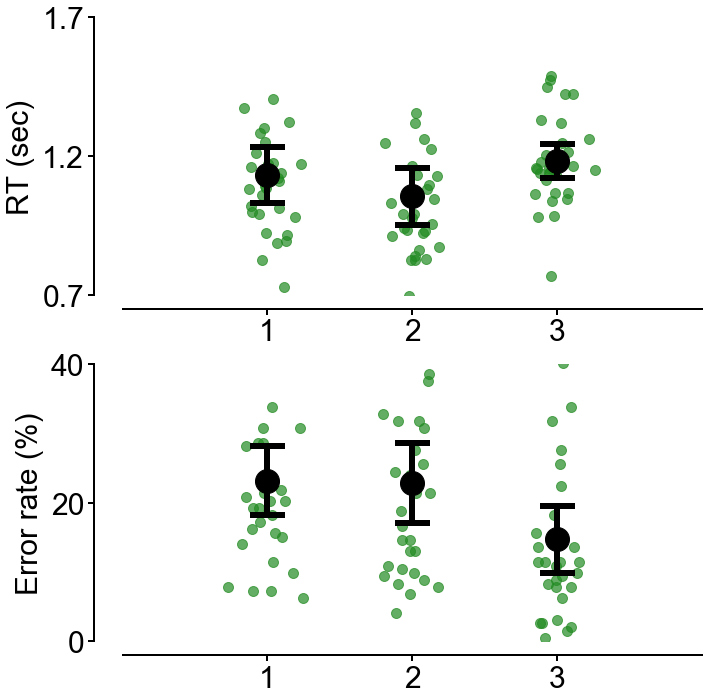

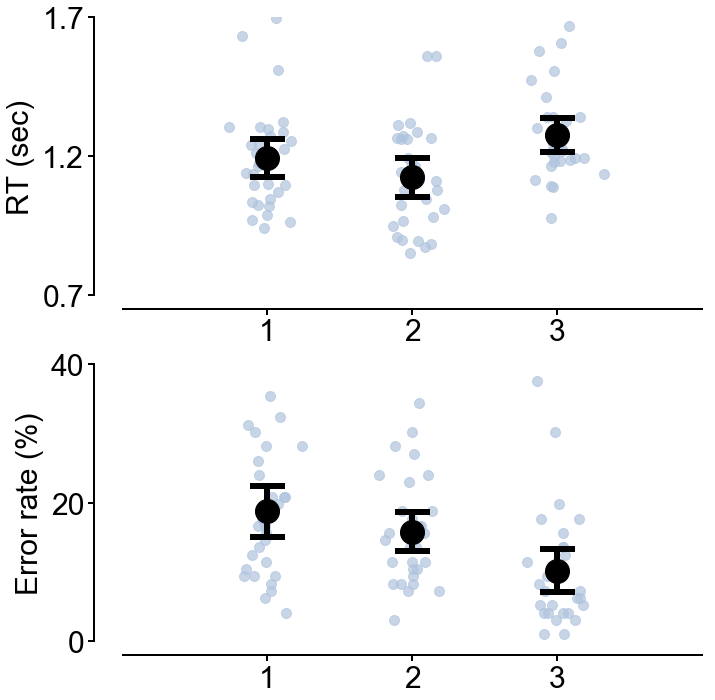

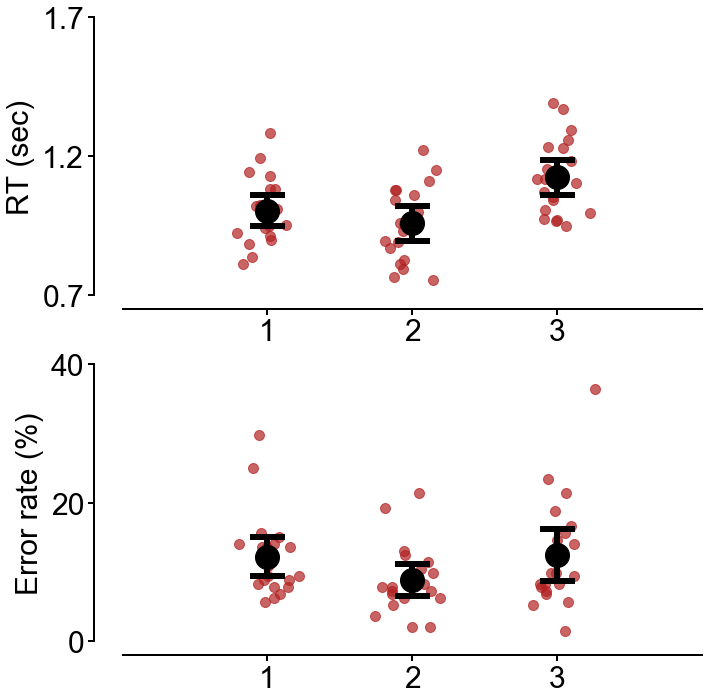

In [6]:
behave_lab = ["rt", "err"]
type_lab = ["m", "r", "c"]
scale = [1,100]
RTs,Errs = [],[]
for t,types in enumerate(data_RT_err):
    print(behave_lab[t])
    for g,group in enumerate(types):
        frames = []
        for d,dataset in enumerate(group):
            frames.append(dataset)
            
        d_for_stat = pd.concat(frames)
        print '\nData shape (rows, columns):', d_for_stat.shape
        display(d_for_stat.head())
        
        if t==0:
            # summary stat on RTs
            pivot = pd.pivot_table(d_for_stat, index=['name'], columns=['correct_key'], values=['rt'], aggfunc=[np.median])
        else:
            # summary stat on Errors
            pivot = pd.pivot_table(d_for_stat, index=['name'], columns=['correct_key'], values=['error'], aggfunc=[np.mean])
        display(pivot)

        ## stat test
        NO_col = pivot.values.shape[1]
        ix = np.triu_indices(NO_col,1)
        ii=0
        for i,j in zip(ix[0],ix[1]):

            d1 = pivot.values[:,i]
            d2 = pivot.values[:,j]

            print 'mean '+behave_lab[t]+':', np.mean(d1),np.mean(d2)
            print 'T test for comparing', i,' to ', j,' in '+behave_lab[t]+":", sc.ttest_rel(d1,d2)," Cohen'd:", (0-np.mean(d1-d2))/np.std(d1-d2)

            np.savetxt(filepath+'results/exp1_resp_type_'+behave_lab[t]+'_'+type_lab[g]+str(ii)+'.csv',np.vstack(((d1, d2))).T)
            ii=ii+1
        
        D=[pivot.values[:,i]*scale[t] for i in range(NO_col)]
        if t==0:
            RTs.append(D)
        else:
            Errs.append(D)
        
## plots   
colors = ['forestgreen', 'lightsteelblue', 'firebrick']
plot_name = ['sumstat_resp_types_main', 'sumstat_resp_types_rep', 'sumstat_resp_types_cont']
for t,rt,err in zip(range(len(RTs)), RTs, Errs):
    data = [[rt, err]]
    ErrorBarsForMeans(data, 
                      SpreadOfX = 0.1,
                      YError = 'CI', 
                      plotsize = [10,10], 
                      axeslimit = [[0.7,0],[1.7000001,40.0000001],[0.5,20]], 
                      axisLabels = [[],['RT (sec)', 'Error rate (%)']], 
                      SameAxisLabel = True, 
                      SubplotTitles = [], 
                      SameSubplotTitles = True, 
                      plotTitle = '', 
                      ThresValue = [], 
                      AxisTicks = [[],[]], 
                      SaveFigName = figpath+plot_name[t]+'.pdf', 
                      Outliers = [],
                      axisTouching = True,
                      axisWidth = 2,
                      titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                      axisFont = {'fontname':'Arial', 'size':'30'},
                      ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10,
                                  'ErrColor':['k','k','k','k','k','k'],
                                  'DotsColor':[colors[t],colors[t],colors[t],colors[t]],
                                  'DotsTransp':0.7,'OutlierDotsColor':'r'})

# Familiarity test

Main
statistical learning
one sample t-test; t-value=  [-1.40936204] p value=  [0.1693621] 0.26171196129510693


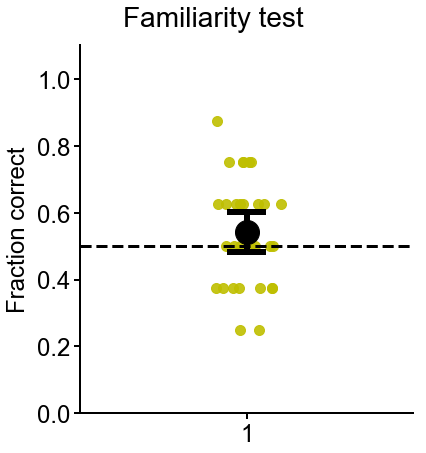

Replication
statistical learning
one sample t-test; t-value=  [-1.32573593] p value=  [0.19527611] 0.24618298195866542


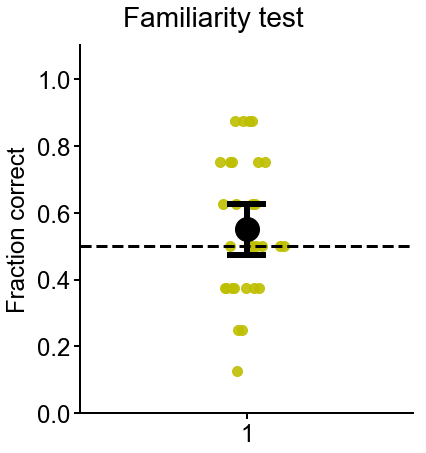

In [7]:
type_lab = ["Main", "Replication"]
fam_perf = []
for t,df in enumerate(data_fam):
    
    pivot = pd.pivot_table(df, index=['name'], values=['error'],aggfunc=[np.mean])
    stat_learning1 = sc.ttest_1samp(pivot.values,0.5)
    
    print type_lab[t]
    print 'statistical learning'
    print 'one sample t-test; t-value= ', stat_learning1[0], 'p value= ', stat_learning1[1], (0.5-np.mean(pivot.values))/np.std(pivot.values)
    
    fam_perf.append(1-pivot.values)
    data = [[[1-pivot.values]]]
    ErrorBarsForMeans(data, SpreadOfX = 0.1, YError = 'CI', plotsize = [6,6], axeslimit = [[0],[1.1],[0.2]], axisLabels = [[],['Fraction correct']], SameAxisLabel = True, SubplotTitles = [], SameSubplotTitles = True, plotTitle = 'Familiarity test', ThresValue = [0.5], AxisTicks = [[],[]], SaveFigName = [], Outliers = [],
                            titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                            axisFont = {'fontname':'Arial', 'size':'24'},
                            ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10, 'ErrColor':['k'], 'DotsColor':['y'],'DotsTransp':0.9,'OutlierDotsColor':'r'})


# Chunk-based effect in the four blocks separately

m


median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.288974  1.077435  1.137191
2.0   1.542378  1.232211  1.283131
3.0   1.410521  1.176115  1.236770
4.0   1.395980  1.556150  1.521436
5.0   1.397597  1.290347  1.178908
6.0   0.945437  1.054055  1.084964
7.0   1.655958  1.504469  1.309304
8.0   1.657349  1.468673  1.489232
9.0   1.353946  1.133798  1.329732
10.0  1.082976  1.050900  1.002101
11.0  0.901286  0.852661  0.783798
12.0  1.731877  2.147680  1.517586
13.0  1.533192  1.155491  1.352472
14.0  1.205326  1.079642  1.189343
15.0  1.490896  2.367985  1.947022
16.0  1.272369  1.228861  1.270444
17.0  1.128445  1.102974  1.263747
18.0  1.555870  1.493027  1.358452
19.0  1.440611  1.252797  1.343463
20.0  1.169157  1.337442  1.224754
21.0  1.678266  2.453218  1.592489
22.0  1.262081  1.380193  1.501001
23.0  1.481920  1.505262  1.519061
24.0  1.331000  1.136789  1.207668
25.0  1.170904  1.259897  1.208016
26.0  1.215212  1.508761  1.265236
27.0  1.215336  1.269896  1.085488
28.0  2.128591  3.147435  2.862529
29.0  1.699040  1.586733  1.747755
30.0  1.838554  1.831114  1.877575

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.171145  0.963157  0.883141
2.0   1.320149  1.151721  1.116331
3.0   1.329379  1.081488  1.007440
4.0   1.257992  1.510376  1.406414
5.0   1.217825  1.061202  0.948784
6.0   0.944010  0.930974  1.064589
7.0   1.375215  1.156723  1.029757
8.0   1.210427  1.196378  1.234957
9.0   1.120928  0.953474  1.051886
10.0  1.010264  0.871888  0.872248
11.0  0.764813  0.687215  0.738128
12.0  1.371612  1.158904  1.090515
13.0  1.220311  1.109644  0.981688
14.0  1.017984  0.990228  0.966365
15.0  1.237131  1.452526  1.186531
16.0  1.156614  1.216460  1.097873
17.0  1.175026  1.180197  1.208454
18.0  1.320956  1.023658  1.208448
19.0  1.261520  1.186103  1.313653
20.0  1.114019  0.978214  1.028161
21.0  1.214691  1.188725  1.445253
22.0  1.221768  1.394336  1.309625
23.0  1.180866  1.108169  1.089528
24.0  1.062969  0.996388  1.048654
25.0  1.071598  0.931165  0.904474
26.0  1.027493  1.040970  1.048495
27.0  0.777987  1.081546  0.777987
28.0  1.628950  2.683341  2.544649
29.0  1.537332  1.385139  1.250749
30.0  1.191039  1.035099  1.063872

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.073147  0.946552  0.874904
2.0   1.070312  0.986916  0.919085
3.0   1.325967  1.166482  1.120664
4.0   1.073992  0.944068  1.114790
5.0   1.178361  0.998339  0.878328
6.0   1.184912  1.083375  1.219589
7.0   1.258849  1.000947  0.957797
8.0   1.296632  1.283040  1.242634
9.0   1.021918  0.952220  0.865348
10.0  0.958425  0.775924  0.807696
11.0  0.713519  0.699235  0.691391
12.0  1.173262  0.874648  0.842738
13.0  1.055349  0.920297  0.889873
14.0  1.061214  0.894485  0.909173
15.0  1.604893  1.354668  1.245035
16.0  1.079576  1.063894  0.950385
17.0  1.302754  1.228136  1.223513
18.0  1.186787  1.006357  1.113032
19.0  1.078310  1.048928  1.106942
20.0  1.004435  0.726954  0.768012
21.0  1.044776  1.160581  1.179286
22.0  1.010394  1.246584  1.207637
23.0  1.021365  0.881496  0.946046
24.0  1.050401  0.939623  1.026765
25.0  0.936069  0.805190  0.842246
26.0  0.911277  1.067211  1.057905
27.0  0.538193  0.741144  0.946511
28.0  1.408762  2.134118  2.183489
29.0  1.274895  1.161776  1.276338
30.0  1.030560  0.806306  0.910149

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   0.968719  0.740320  0.756719
2.0   1.000869  0.895635  0.896973
3.0   1.260419  0.952889  0.956098
4.0   1.050151  0.945944  1.091213
5.0   1.049100  0.858705  0.825595
6.0   1.119959  1.023867  1.202970
7.0   1.142591  0.860572  0.846988
8.0   1.294005  1.308991  1.249088
9.0   1.039544  0.834512  0.856982
10.0  1.011423  0.819417  0.803011
11.0  0.704261  0.655752  0.673034
12.0  0.951020  0.843798  0.825585
13.0  0.942829  0.828534  0.853207
14.0  1.000321  0.931776  0.897219
15.0  1.493410  1.160606  1.133612
16.0  1.015003  1.066579  0.866083
17.0  1.322798  1.164495  1.209873
18.0  1.254844  1.044604  1.006217
19.0  1.027395  1.011958  0.971567
20.0  0.858223  0.720573  0.662354
21.0  1.026716  1.121869  1.105923
22.0  1.044512  1.144204  1.355644
23.0  1.013126  0.870795  0.817648
24.0  1.022123  0.818985  0.879453
25.0  0.853577  0.674220  0.730505
26.0  0.889060  1.040951  0.964667
27.0  0.555459  0.591113  0.645701
28.0  1.223093  1.620886  1.834082
29.0  1.035414  0.928036  1.086908
30.0  1.071839  0.872487  0.830379

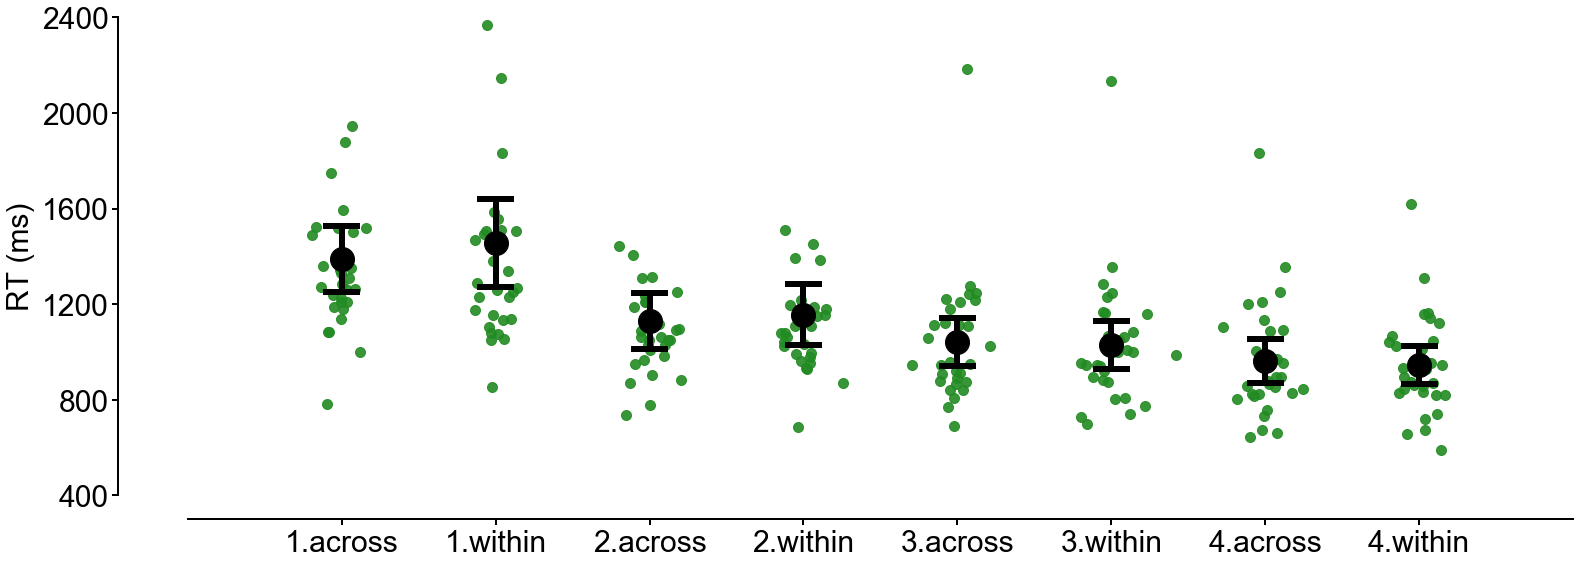

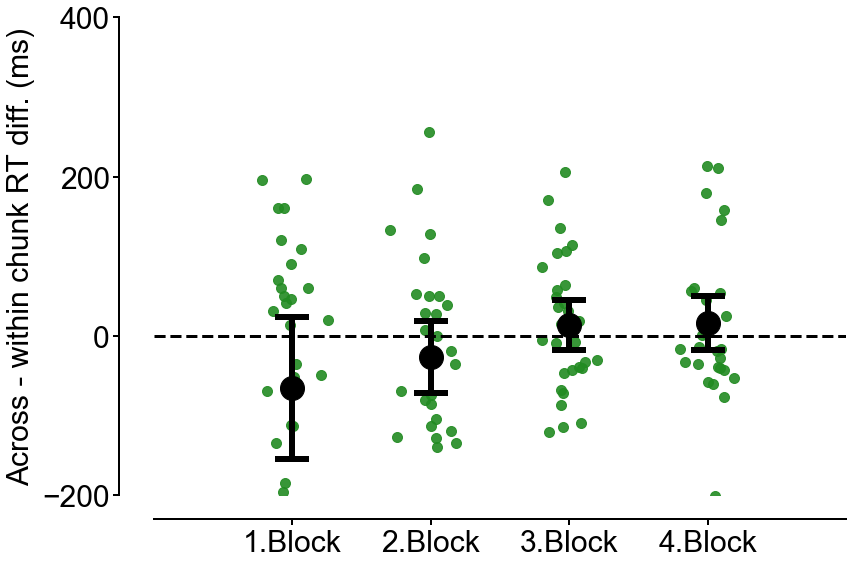

Testing chunk-based effect in the blocks:
Number of participants: 30
('difference between within and across trials', '1st block: T test for comparing rt', Ttest_relResult(statistic=-1.498535165257205, pvalue=0.14480184521311704), ' Cohen d:', 0.27827099428264096)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing rt', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing rt', Ttest_relResult(statistic=-1.1783499159416169, pvalue=0.2482360301277815), ' Cohen d:', 0.2188140861316792)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing rt', Ttest_relResult(statistic=-0.7788621129096565, pvalue=0.4423704144431203), ' Cohen d:', 0.14463106345005183)
('difference between within and across trials', '3rd block: T test for comparing rt', Ttest_relResult(statistic=0.9021078305046611, pvalue=0.37443149880931126), ' Cohen d:', -0.16

/home/lengyel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in double_scalars


median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.275478  1.001357  1.085222
2.0   1.371472  1.311926  1.321516
3.0   1.237143  1.056955  1.175234
4.0   2.004009  1.460921  1.864367
5.0   1.543296  1.359896  1.765799
6.0   1.241831  1.368064  1.302735
7.0   1.275024  1.284769  1.192918
8.0   1.187813  1.238760  1.126475
9.0   1.470417  1.629669  1.385677
11.0  1.159319  1.121163  1.022842
12.0  1.519770  1.399227  1.438898
13.0  1.312706  1.127520  1.155895
14.0  1.524980  1.601620  1.636275
15.0  1.640537  1.487139  1.472311
16.0  1.381688  1.336039  1.476523
17.0  1.060226  1.138390  1.087890
18.0  1.224326  1.091002  1.045325
19.0  1.473053  1.261176  1.199497
20.0  1.317911  1.438301  1.399150
21.0  1.265568  1.051068  1.290090
22.0  1.420167  1.371677  1.444932
23.0  1.449257  1.360464  1.378544
24.0  1.255817  1.088444  1.190968
25.0  1.171325  0.883895  1.043875
26.0  1.917268  1.698416  1.783847
27.0  1.292093  1.168063  0.966170
28.0  1.426399  1.317555  1.342868
29.0  1.133124  1.128796  1.021112
30.0  1.728937  1.479090  1.577377
31.0  1.286687  1.155669  1.243005

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.094302  0.899101  0.818214
2.0   1.186188  1.216824  1.104910
3.0   0.955959  0.919511  0.868178
4.0   1.276668  1.108307  1.057885
5.0   1.221102  1.268099  1.158724
6.0   1.188849  1.162771  1.180813
7.0   1.276426  1.125823  1.141117
8.0   1.203129  1.091251  1.015729
9.0   1.259914  1.313732  1.271339
11.0  1.151723  0.954696  0.944171
12.0  1.300720  1.207289  1.208543
13.0  1.061252  1.020850  0.923886
14.0  1.489135  1.603285  1.654272
15.0  1.356695  1.187009  1.213319
16.0  1.127156  0.912274  1.020546
17.0  0.914365  0.856380  0.792697
18.0  1.136451  0.918079  0.906355
19.0  1.106642  0.907675  0.964584
20.0  1.052948  1.063356  1.236598
21.0  1.008169  0.917108  0.936220
22.0  1.081936  0.938168  1.039878
23.0  1.130112  1.074173  1.156293
24.0  1.071429  0.846491  0.878612
25.0  0.981342  0.792844  0.834301
26.0  1.314322  1.163266  1.286476
27.0  1.062715  1.004053  0.905204
28.0  1.246979  1.028824  0.983526
29.0  1.049269  0.800714  0.824196
30.0  1.156084  1.043232  0.989325
31.0  1.005863  0.917581  1.017259

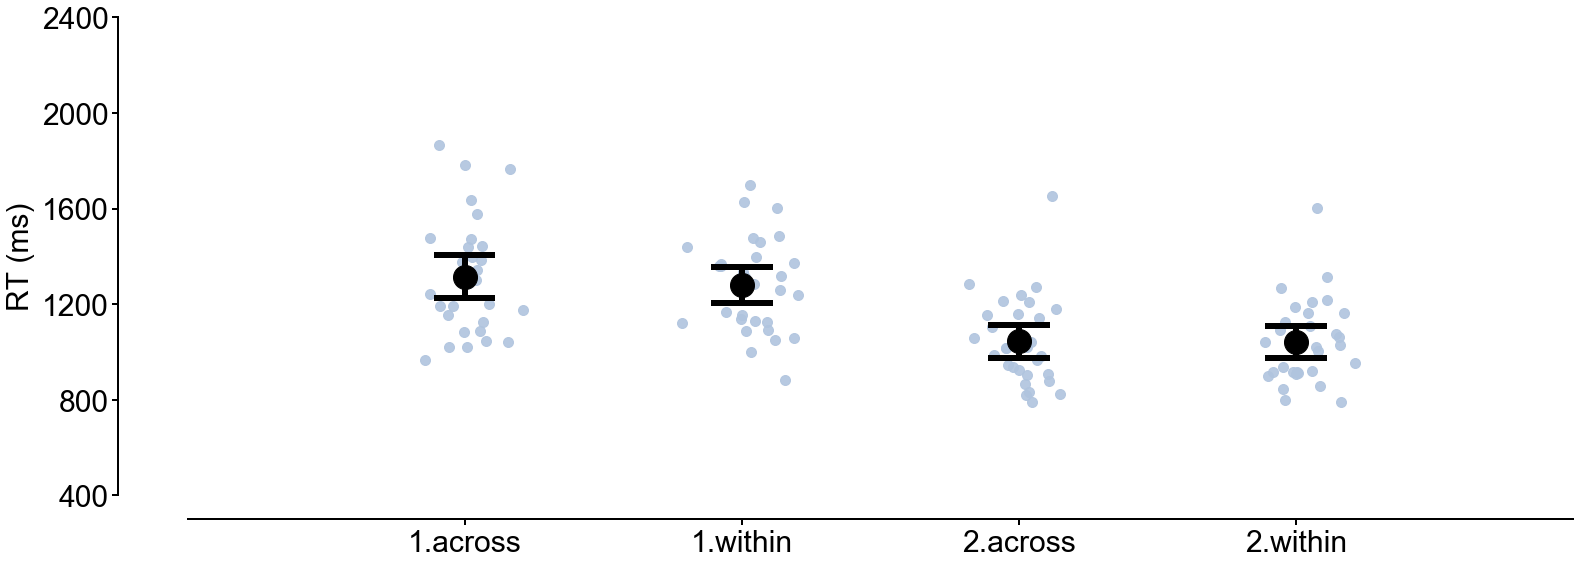

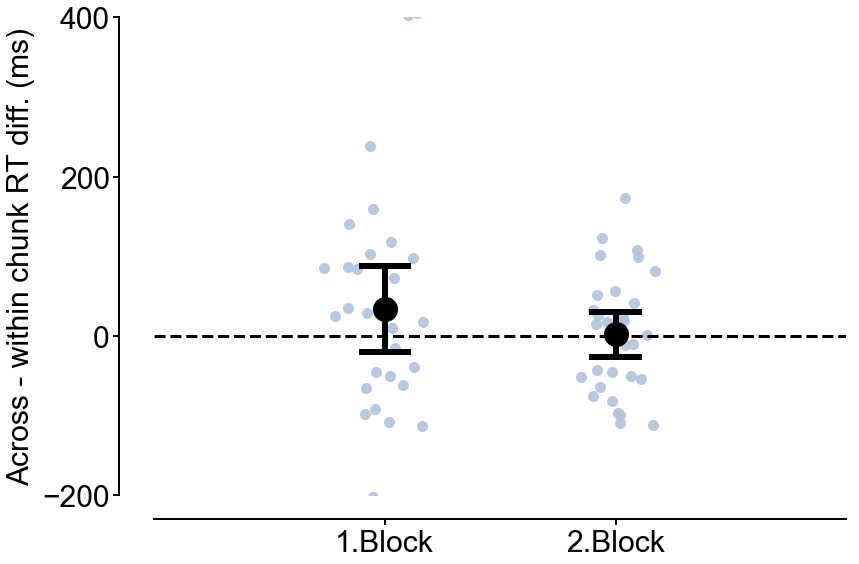

Testing chunk-based effect in the blocks:
Number of participants: 30
('difference between within and across trials', '1st block: T test for comparing rt', Ttest_relResult(statistic=1.2755776765583593, pvalue=0.21222835837703038), ' Cohen d:', -0.2368688280196026)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing rt', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing rt', Ttest_relResult(statistic=0.1695534874840875, pvalue=0.8665385374696559), ' Cohen d:', -0.03148529219745616)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing rt', Ttest_relResult(statistic=1.0502592209243045, pvalue=0.3022727650458232), ' Cohen d:', -0.19502824120310575)


median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.238496  1.104402  1.260459
2.0   1.235419  1.257128  1.281310
3.0   1.036278  0.934635  1.016872
4.0   1.183286  0.983581  1.048008
5.0   1.108613  1.041165  1.053637
6.0   1.788460  1.387947  1.451381
7.0   1.178145  1.143766  1.043459
8.0   1.087954  1.035780  0.989703
9.0   1.287996  0.993855  0.947234
10.0  1.276272  1.460989  1.318214
11.0  1.079276  0.963021  1.140176
12.0  1.408012  1.265591  1.275164
13.0  1.478032  1.181379  1.137424
14.0  1.321281  1.367847  1.231639
15.0  1.250736  1.106145  1.219118
16.0  1.745305  1.825150  1.680575
17.0  1.409600  1.154315  1.268954
18.0  1.270029  0.970434  0.968711
19.0  1.638502  1.372156  1.274196
20.0  1.895574  1.364563  1.435978

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.143324  1.015321  1.154502
2.0   1.194977  1.148140  1.119509
3.0   0.955323  0.764226  0.922726
4.0   0.951375  0.894332  0.905148
5.0   0.958209  0.818041  0.853482
6.0   1.209151  0.929111  0.947029
7.0   1.086513  0.924724  0.887951
8.0   0.956734  0.867084  0.952435
9.0   1.006629  0.716343  0.789326
10.0  1.145610  1.136401  1.052501
11.0  1.043833  0.774259  0.787667
12.0  1.213178  1.235997  1.144343
13.0  1.151714  0.993555  0.928721
14.0  1.038426  1.220849  1.192591
15.0  1.177447  1.006031  1.029401
16.0  1.339473  1.164131  1.277593
17.0  1.117078  1.066031  1.060552
18.0  1.076533  0.857131  0.907577
19.0  1.232215  0.951968  0.960275
20.0  1.637652  1.349345  1.166131

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.080102  0.855791  0.926887
2.0   1.156299  1.116022  1.149546
3.0   0.847654  0.823826  0.762423
4.0   0.860527  0.838189  0.783949
5.0   0.905670  0.790181  0.822296
6.0   1.130488  0.867486  0.795951
7.0   0.997408  0.831812  0.829717
8.0   1.021393  0.942109  0.976880
9.0   0.794003  0.723534  0.737245
10.0  1.001814  0.982039  0.881035
11.0  0.949611  0.779547  0.807645
12.0  1.212595  1.179226  1.123412
13.0  1.199632  1.023493  0.937072
14.0  1.030437  1.024719  0.933820
15.0  1.006944  0.808364  0.805127
16.0  1.208155  0.984991  0.990052
17.0  1.061987  1.023763  1.021768
18.0  1.157034  0.991327  0.931877
19.0  1.111886  0.895552  0.945160
20.0  1.171883  0.986134  1.074296

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   0.973242  0.824194  0.835898
2.0   1.017908  1.063983  1.082621
3.0   0.866959  0.715511  0.777666
4.0   0.794574  0.719892  0.780421
5.0   0.903772  0.860688  0.755258
6.0   1.075993  0.754949  0.857908
7.0   0.876306  0.813802  0.783880
8.0   0.873721  0.845860  0.826087
9.0   0.768536  0.677884  0.671871
10.0  0.963910  0.943058  1.042234
11.0  0.861374  0.702120  0.776538
12.0  1.148888  1.052057  1.080864
13.0  1.002649  0.786750  0.923790
14.0  0.927059  0.949335  0.775237
15.0  0.993303  0.918193  0.866233
16.0  1.153042  1.018019  0.963785
17.0  1.076345  0.926038  0.952882
18.0  0.941935  0.757032  0.818420
19.0  1.084443  0.759557  0.858877
20.0  0.994975  0.929005  0.961974

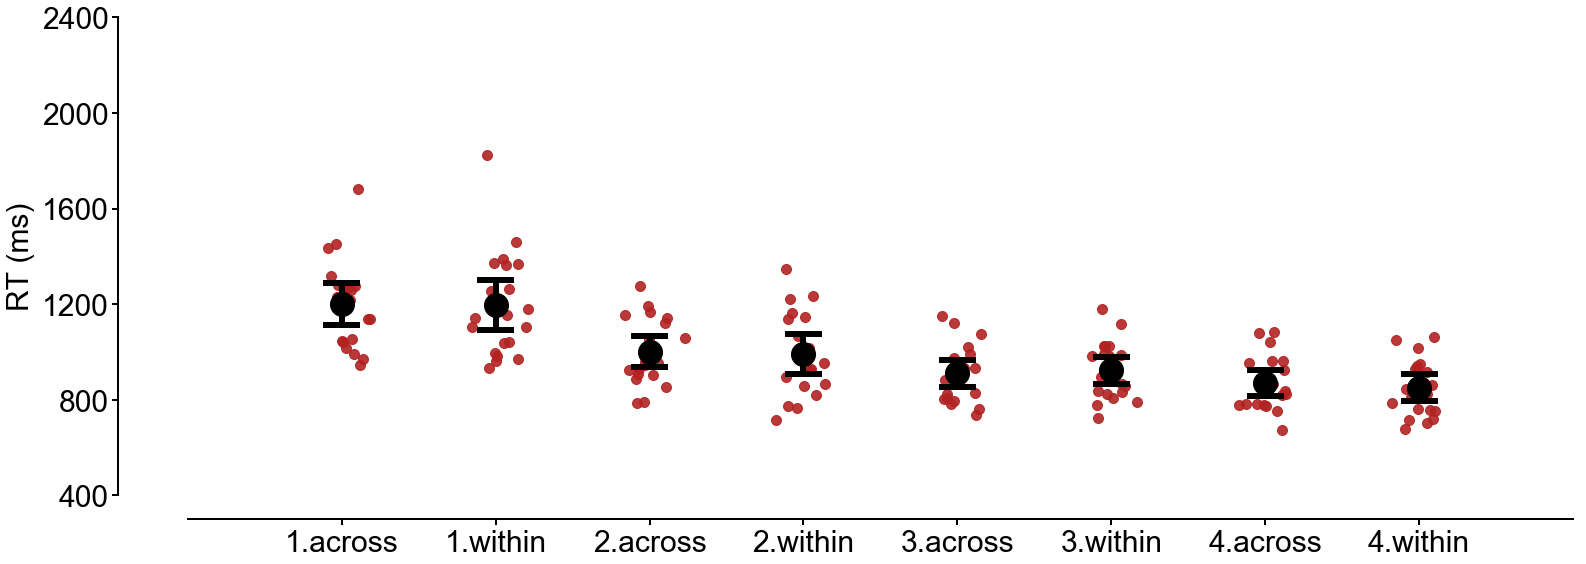

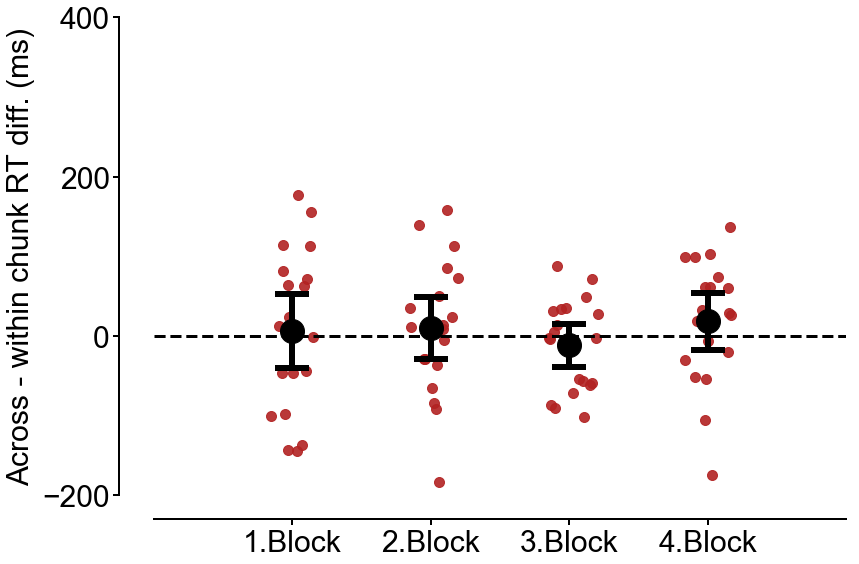

Testing chunk-based effect in the blocks:
Number of participants: 20
('difference between within and across trials', '1st block: T test for comparing rt', Ttest_relResult(statistic=0.28899834540610103, pvalue=0.7757122709592431), ' Cohen d:', -0.06630076749871877)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing rt', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing rt', Ttest_relResult(statistic=0.5600241798233693, pvalue=0.5820062957804274), ' Cohen d:', -0.12847835819943773)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing rt', Ttest_relResult(statistic=-0.14640880042752047, pvalue=0.8851409392241685), ' Cohen d:', 0.033588482395188225)
('difference between within and across trials', '3rd block: T test for comparing rt', Ttest_relResult(statistic=-0.9123823195095181, pvalue=0.3729995692678534), ' Cohen d:', 0

mean                   
         error                   
Code       0.0      1.0       2.0
name                             
1.0   0.203125  0.34375  0.312500
2.0   0.265625  0.09375  0.041667
3.0   0.093750  0.06250  0.208333
4.0   0.078125  0.06250  0.395833
5.0   0.187500  0.09375  0.229167
6.0   0.406250  0.71875  0.645833
7.0   0.437500  0.31250  0.395833
8.0   0.203125  0.09375  0.104167
9.0   0.046875  0.09375  0.187500
10.0  0.109375  0.18750  0.187500
11.0  0.093750  0.15625  0.125000
12.0  0.859375  0.87500  0.875000
13.0  0.140625  0.15625  0.208333
14.0  0.250000  0.31250  0.437500
15.0  0.218750  0.40625  0.562500
16.0  0.125000  0.15625  0.479167
17.0  0.109375  0.21875  0.250000
18.0  0.234375  0.46875  0.520833
19.0  0.125000  0.31250  0.312500
20.0  0.171875  0.50000  0.583333
21.0  0.265625  0.78125  0.875000
22.0  0.187500  0.34375  0.354167
23.0  0.218750  0.09375  0.250000
24.0  0.156250  0.18750  0.250000
25.0  0.156250  0.28125  0.354167
26.0  0.140625  0.40625  0.458333
27.0  0.375000  0.56250  0.666667
28.0  0.203125  0.37500  0.479167
29.0  0.234375  0.18750  0.312500
30.0  0.187500  0.15625  0.166667

mean                   
         error                   
Code       0.0      1.0       2.0
name                             
1.0   0.250000  0.21875  0.229167
2.0   0.156250  0.09375  0.125000
3.0   0.156250  0.03125  0.062500
4.0   0.046875  0.15625  0.145833
5.0   0.140625  0.18750  0.125000
6.0   0.328125  0.53125  0.562500
7.0   0.406250  0.28125  0.270833
8.0   0.000000  0.12500  0.041667
9.0   0.031250  0.03125  0.041667
10.0  0.140625  0.03125  0.020833
11.0  0.015625  0.03125  0.062500
12.0  0.140625  0.12500  0.125000
13.0  0.140625  0.21875  0.062500
14.0  0.125000  0.15625  0.125000
15.0  0.250000  0.34375  0.437500
16.0  0.062500  0.18750  0.187500
17.0  0.171875  0.09375  0.104167
18.0  0.156250  0.25000  0.166667
19.0  0.125000  0.25000  0.291667
20.0  0.687500  0.56250  0.520833
21.0  0.140625  0.15625  0.125000
22.0  0.109375  0.34375  0.312500
23.0  0.265625  0.25000  0.208333
24.0  0.125000  0.28125  0.187500
25.0  0.078125  0.25000  0.187500
26.0  0.234375  0.37500  0.395833
27.0  0.546875  0.68750  0.729167
28.0  0.062500  0.43750  0.354167
29.0  0.078125  0.18750  0.166667
30.0  0.046875  0.12500  0.083333

mean                   
         error                   
Code       0.0      1.0       2.0
name                             
1.0   0.218750  0.15625  0.187500
2.0   0.046875  0.09375  0.083333
3.0   0.171875  0.06250  0.083333
4.0   0.046875  0.21875  0.083333
5.0   0.156250  0.09375  0.125000
6.0   0.312500  0.28125  0.270833
7.0   0.328125  0.06250  0.270833
8.0   0.062500  0.06250  0.125000
9.0   0.046875  0.03125  0.083333
10.0  0.062500  0.00000  0.020833
11.0  0.015625  0.12500  0.041667
12.0  0.062500  0.00000  0.062500
13.0  0.203125  0.09375  0.083333
14.0  0.093750  0.12500  0.125000
15.0  0.203125  0.25000  0.250000
16.0  0.078125  0.18750  0.166667
17.0  0.296875  0.25000  0.250000
18.0  0.140625  0.12500  0.250000
19.0  0.187500  0.18750  0.083333
20.0  0.234375  0.34375  0.145833
21.0  0.031250  0.03125  0.145833
22.0  0.078125  0.43750  0.291667
23.0  0.265625  0.15625  0.229167
24.0  0.093750  0.25000  0.083333
25.0  0.156250  0.09375  0.041667
26.0  0.156250  0.37500  0.479167
27.0  0.718750  0.53125  0.625000
28.0  0.062500  0.12500  0.187500
29.0  0.078125  0.09375  0.062500
30.0  0.109375  0.18750  0.104167

mean                   
         error                   
Code       0.0      1.0       2.0
name                             
1.0   0.343750  0.15625  0.145833
2.0   0.062500  0.09375  0.041667
3.0   0.062500  0.06250  0.062500
4.0   0.093750  0.18750  0.145833
5.0   0.031250  0.09375  0.125000
6.0   0.328125  0.46875  0.312500
7.0   0.265625  0.25000  0.312500
8.0   0.078125  0.00000  0.062500
9.0   0.046875  0.03125  0.041667
10.0  0.031250  0.09375  0.020833
11.0  0.046875  0.06250  0.062500
12.0  0.031250  0.00000  0.020833
13.0  0.125000  0.12500  0.145833
14.0  0.031250  0.09375  0.208333
15.0  0.171875  0.21875  0.125000
16.0  0.062500  0.12500  0.250000
17.0  0.250000  0.21875  0.250000
18.0  0.109375  0.15625  0.125000
19.0  0.062500  0.15625  0.166667
20.0  0.343750  0.12500  0.333333
21.0  0.046875  0.12500  0.125000
22.0  0.093750  0.37500  0.354167
23.0  0.187500  0.12500  0.166667
24.0  0.140625  0.09375  0.166667
25.0  0.031250  0.06250  0.062500
26.0  0.078125  0.59375  0.500000
27.0  0.812500  0.59375  0.625000
28.0  0.046875  0.15625  0.104167
29.0  0.062500  0.00000  0.083333
30.0  0.062500  0.12500  0.187500

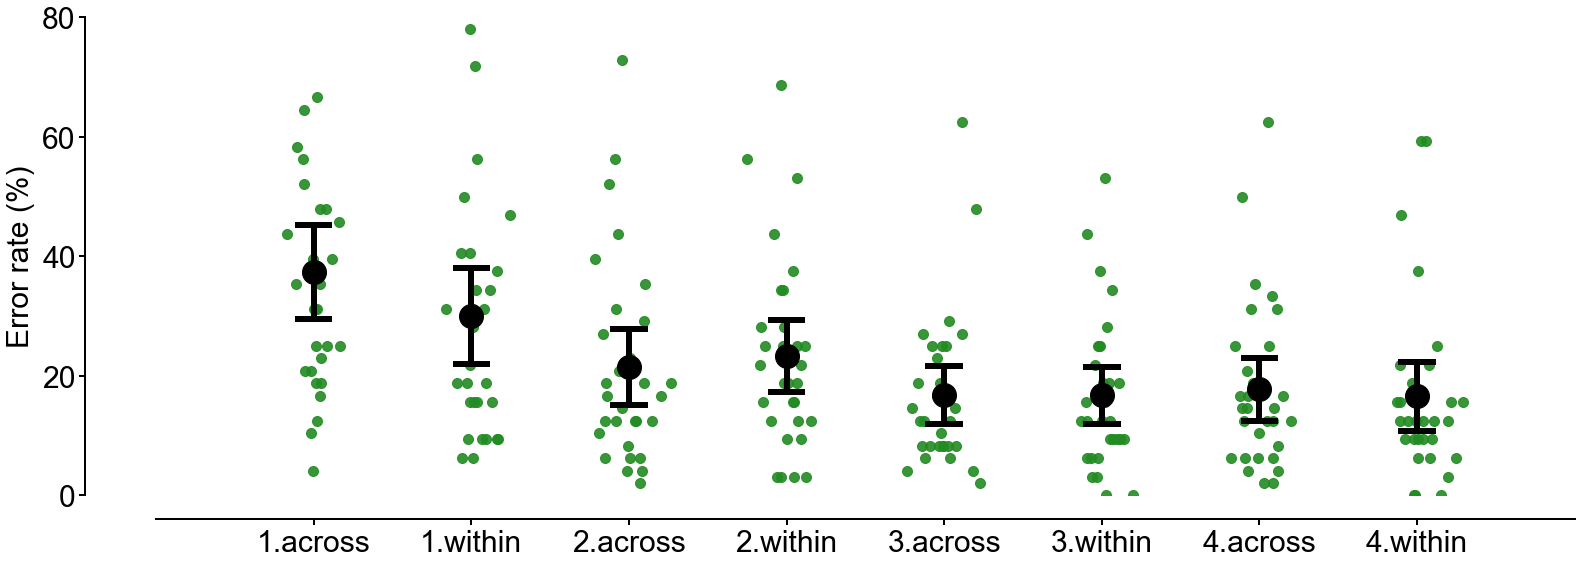

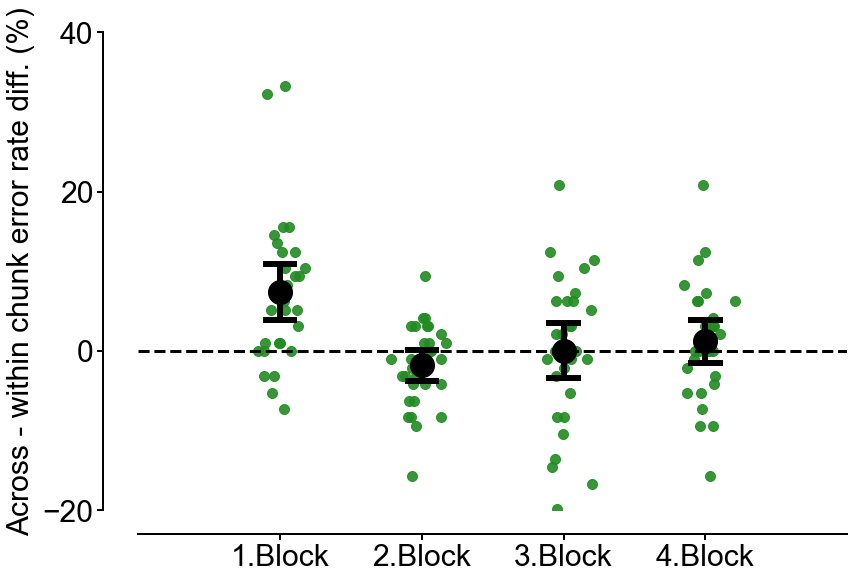

Testing chunk-based effect in the blocks:
Number of participants: 30
('difference between within and across trials', '1st block: T test for comparing err', Ttest_relResult(statistic=4.372530809767708, pvalue=0.00014433192298597274), ' Cohen d:', -0.811958587409393)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing err', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing err', Ttest_relResult(statistic=-1.9081821164655146, pvalue=0.0663120110214502), ' Cohen d:', 0.3543405234204663)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing err', Ttest_relResult(statistic=4.685527096300028, pvalue=6.0750058481131876e-05), ' Cohen d:', -0.8700805386851737)
('difference between within and across trials', '3rd block: T test for comparing err', Ttest_relResult(statistic=0.020478872729247286, pvalue=0.983801621986371), ' Cohen d:

mean                   
         error                   
Code       0.0      1.0       2.0
name                             
1.0   0.125000  0.21875  0.125000
2.0   0.093750  0.15625  0.104167
3.0   0.062500  0.06250  0.020833
4.0   0.359375  0.09375  0.145833
5.0   0.156250  0.28125  0.354167
6.0   0.171875  0.31250  0.375000
7.0   0.171875  0.21875  0.416667
8.0   0.187500  0.31250  0.333333
9.0   0.171875  0.18750  0.250000
11.0  0.015625  0.09375  0.104167
12.0  0.203125  0.12500  0.395833
13.0  0.390625  0.15625  0.312500
14.0  0.078125  0.15625  0.208333
15.0  0.109375  0.21875  0.229167
16.0  0.062500  0.21875  0.187500
17.0  0.046875  0.06250  0.125000
18.0  0.140625  0.09375  0.187500
19.0  0.140625  0.25000  0.145833
20.0  0.171875  0.40625  0.312500
21.0  0.078125  0.12500  0.187500
22.0  0.093750  0.03125  0.166667
23.0  0.281250  0.31250  0.270833
24.0  0.234375  0.28125  0.312500
25.0  0.171875  0.15625  0.291667
26.0  0.203125  0.18750  0.395833
27.0  0.093750  0.09375  0.104167
28.0  0.046875  0.06250  0.145833
29.0  0.109375  0.18750  0.208333
30.0  0.109375  0.18750  0.104167
31.0  0.234375  0.34375  0.437500

mean                   
         error                   
Code       0.0      1.0       2.0
name                             
1.0   0.109375  0.12500  0.104167
2.0   0.078125  0.09375  0.104167
3.0   0.015625  0.06250  0.000000
4.0   0.187500  0.15625  0.062500
5.0   0.078125  0.18750  0.291667
6.0   0.093750  0.15625  0.166667
7.0   0.187500  0.15625  0.062500
8.0   0.156250  0.28125  0.187500
9.0   0.093750  0.12500  0.125000
11.0  0.031250  0.00000  0.062500
12.0  0.171875  0.25000  0.083333
13.0  0.343750  0.09375  0.104167
14.0  0.031250  0.00000  0.041667
15.0  0.078125  0.09375  0.104167
16.0  0.093750  0.15625  0.145833
17.0  0.031250  0.06250  0.083333
18.0  0.046875  0.09375  0.062500
19.0  0.125000  0.15625  0.125000
20.0  0.031250  0.15625  0.145833
21.0  0.078125  0.09375  0.020833
22.0  0.046875  0.06250  0.041667
23.0  0.078125  0.28125  0.291667
24.0  0.078125  0.12500  0.041667
25.0  0.140625  0.12500  0.187500
26.0  0.156250  0.15625  0.229167
27.0  0.093750  0.03125  0.041667
28.0  0.046875  0.09375  0.083333
29.0  0.062500  0.03125  0.083333
30.0  0.109375  0.06250  0.187500
31.0  0.218750  0.34375  0.229167

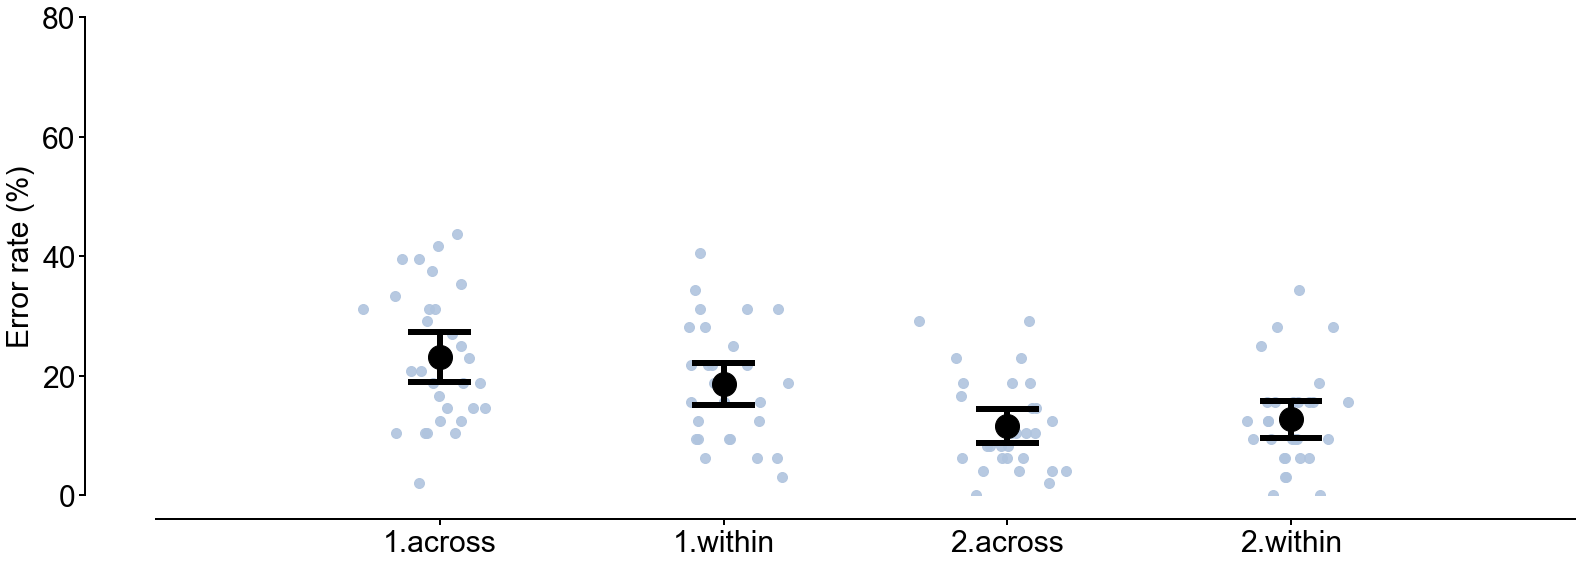

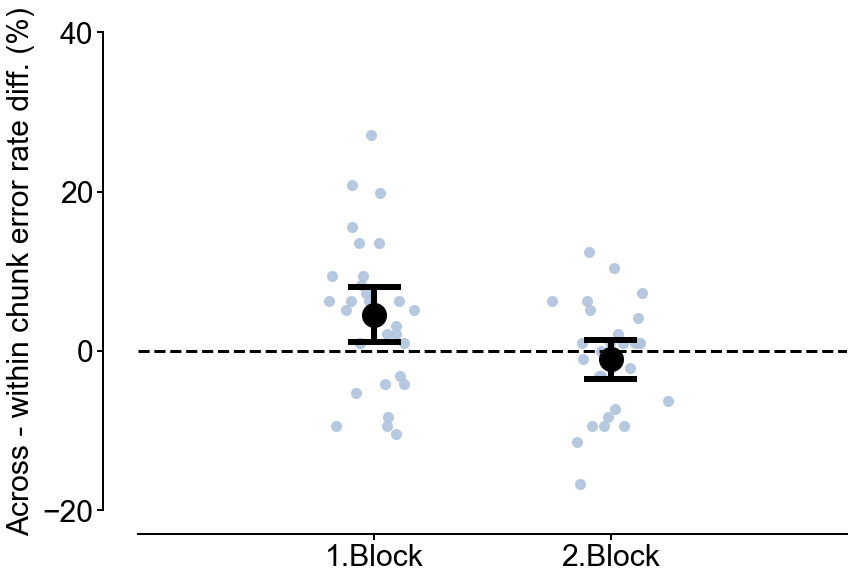

Testing chunk-based effect in the blocks:
Number of participants: 30
('difference between within and across trials', '1st block: T test for comparing err', Ttest_relResult(statistic=2.680407568798855, pvalue=0.011998279529015715), ' Cohen d:', -0.49773918994043265)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing err', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing err', Ttest_relResult(statistic=-0.8572031832052989, pvalue=0.398361311790542), ' Cohen d:', 0.1591786349917533)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing err', Ttest_relResult(statistic=2.4120066027122253, pvalue=0.022419767003205412), ' Cohen d:', -0.44789838177592867)


mean                   
         error                   
Code       0.0      1.0       2.0
name                             
1.0   0.078125  0.09375  0.187500
2.0   0.125000  0.06250  0.250000
3.0   0.125000  0.28125  0.354167
4.0   0.109375  0.03125  0.104167
5.0   0.093750  0.03125  0.062500
6.0   0.265625  0.06250  0.270833
7.0   0.171875  0.12500  0.145833
8.0   0.031250  0.00000  0.166667
9.0   0.125000  0.09375  0.166667
10.0  0.250000  0.25000  0.270833
11.0  0.156250  0.15625  0.291667
12.0  0.234375  0.06250  0.187500
13.0  0.156250  0.03125  0.145833
14.0  0.031250  0.06250  0.062500
15.0  0.156250  0.15625  0.229167
16.0  0.078125  0.00000  0.104167
17.0  0.140625  0.06250  0.187500
18.0  0.078125  0.03125  0.041667
19.0  0.109375  0.09375  0.125000
20.0  0.203125  0.12500  0.187500

mean                   
         error                   
Code       0.0      1.0       2.0
name                             
1.0   0.171875  0.12500  0.125000
2.0   0.078125  0.15625  0.125000
3.0   0.156250  0.15625  0.125000
4.0   0.078125  0.09375  0.145833
5.0   0.078125  0.09375  0.062500
6.0   0.156250  0.06250  0.145833
7.0   0.109375  0.06250  0.020833
8.0   0.015625  0.03125  0.041667
9.0   0.015625  0.06250  0.083333
10.0  0.296875  0.25000  0.229167
11.0  0.140625  0.15625  0.145833
12.0  0.171875  0.09375  0.145833
13.0  0.250000  0.03125  0.062500
14.0  0.046875  0.00000  0.125000
15.0  0.125000  0.06250  0.125000
16.0  0.031250  0.00000  0.020833
17.0  0.093750  0.12500  0.145833
18.0  0.093750  0.09375  0.020833
19.0  0.031250  0.03125  0.041667
20.0  0.109375  0.00000  0.083333

mean                   
         error                   
Code       0.0      1.0       2.0
name                             
1.0   0.140625  0.15625  0.125000
2.0   0.078125  0.15625  0.312500
3.0   0.281250  0.15625  0.166667
4.0   0.062500  0.06250  0.020833
5.0   0.062500  0.09375  0.104167
6.0   0.218750  0.09375  0.062500
7.0   0.171875  0.15625  0.104167
8.0   0.046875  0.03125  0.062500
9.0   0.062500  0.06250  0.041667
10.0  0.250000  0.21875  0.354167
11.0  0.171875  0.03125  0.020833
12.0  0.078125  0.06250  0.166667
13.0  0.453125  0.12500  0.083333
14.0  0.062500  0.06250  0.041667
15.0  0.062500  0.09375  0.166667
16.0  0.093750  0.03125  0.020833
17.0  0.093750  0.09375  0.104167
18.0  0.062500  0.06250  0.041667
19.0  0.109375  0.15625  0.083333
20.0  0.109375  0.00000  0.104167

mean                   
         error                   
Code       0.0      1.0       2.0
name                             
1.0   0.046875  0.00000  0.104167
2.0   0.093750  0.12500  0.104167
3.0   0.093750  0.12500  0.125000
4.0   0.015625  0.00000  0.041667
5.0   0.109375  0.06250  0.145833
6.0   0.171875  0.06250  0.166667
7.0   0.109375  0.03125  0.125000
8.0   0.000000  0.03125  0.000000
9.0   0.093750  0.00000  0.041667
10.0  0.203125  0.15625  0.208333
11.0  0.078125  0.00000  0.041667
12.0  0.125000  0.03125  0.083333
13.0  0.312500  0.00000  0.041667
14.0  0.156250  0.12500  0.125000
15.0  0.078125  0.06250  0.104167
16.0  0.156250  0.09375  0.083333
17.0  0.062500  0.06250  0.166667
18.0  0.031250  0.00000  0.020833
19.0  0.078125  0.03125  0.062500
20.0  0.093750  0.00000  0.041667

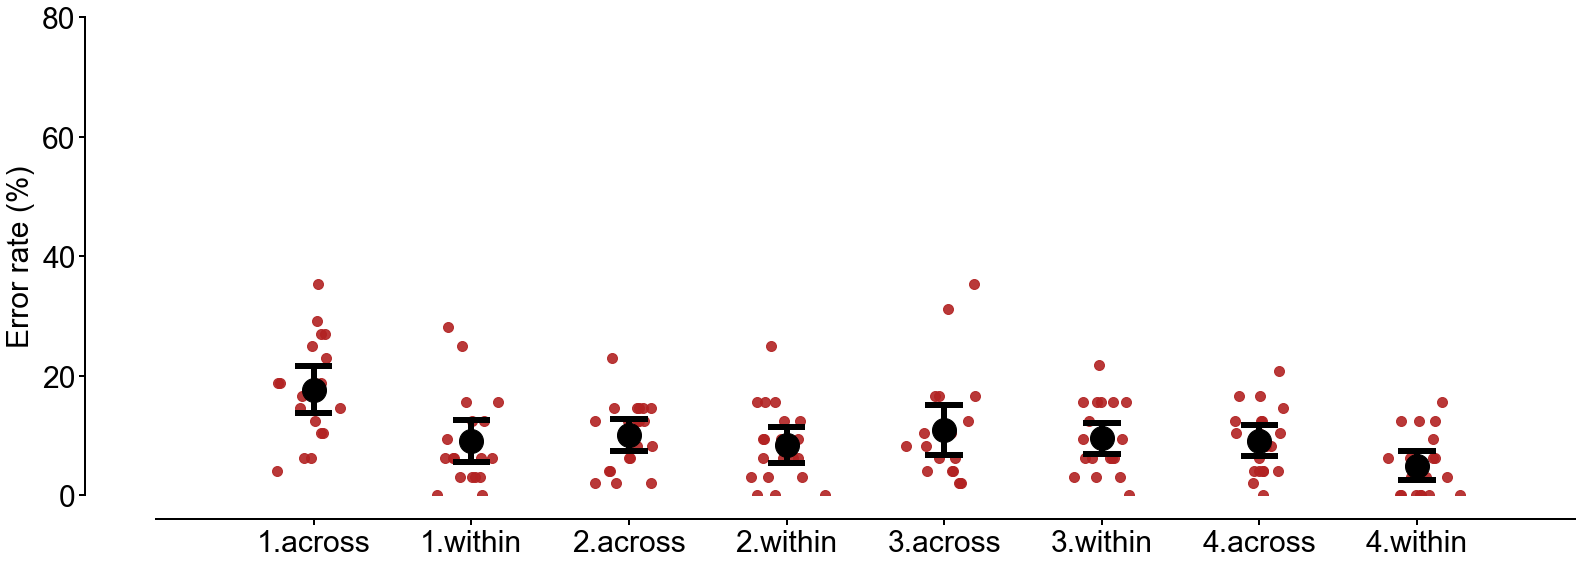

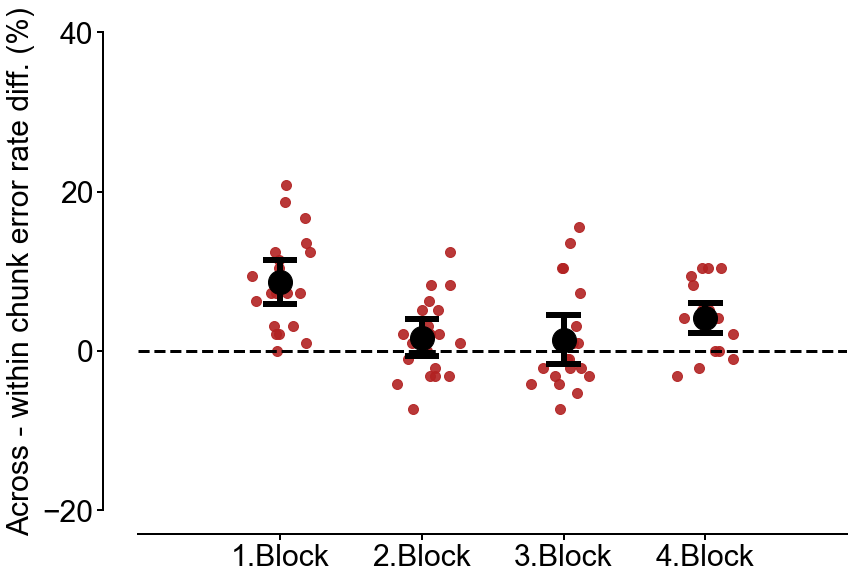

Testing chunk-based effect in the blocks:
Number of participants: 20
('difference between within and across trials', '1st block: T test for comparing err', Ttest_relResult(statistic=6.496867501086106, pvalue=3.1772655863577693e-06), ' Cohen d:', -1.4904836256214717)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing err', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing err', Ttest_relResult(statistic=1.50973101001029, pvalue=0.14756340663608727), ' Cohen d:', -0.3463560476086552)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing err', Ttest_relResult(statistic=4.353084491494633, pvalue=0.0003423829273813603), ' Cohen d:', -0.9986660732168025)
('difference between within and across trials', '3rd block: T test for comparing err', Ttest_relResult(statistic=0.9567682368219977, pvalue=0.35070085578835586), ' Cohen d:'

In [8]:
type_lab = ["m", "r", "c"]
colors = ['forestgreen', 'lightsteelblue', 'firebrick']
plot_name = ['sumstat_chunk_main', 'sumstat_chunk_rep', 'sumstat_chunk_cont']
behave_lab = ["rt","err"]
scale = [1000,100]
axlimit1 = [[[400],[2400.0000001],[400]], [[0],[80.0000001],[20]]]
axlimit2 = [[[-200],[400.0000001],[200]], [[-20],[40.0000001],[20]]]
axlabel1 = ['RT (ms)', 'Error rate (%)']
axlabel2 = ['Across - within chunk RT diff. (ms)', 'Across - within chunk error rate diff. (%)']
block_lab = ['1st','2nd','3rd','4th']
for t,types in enumerate(data_RT_err):
    print(type_lab[t])
    for g,group in enumerate(types):
        pivots = []
        for d,dataset in enumerate(group):
            
            if t==0:
                pivot = pd.pivot_table(dataset, index=['name'], columns=['Code'], values=['rt'], aggfunc=[np.median])
            else:
                pivot = pd.pivot_table(dataset, index=['name'], columns=['Code'], values=['error'], aggfunc=[np.mean])
            display(pivot)
            pivots.append(pivot)      
        
        ## plots
        blocknum = [0,0,1,1,2,2,3,3]
        condnum = [2,1,2,1,2,1,2,1]
        All = [pivots[i].values[:,j]*scale[t] for i,j in zip(blocknum[:len(pivots*2)],condnum[:len(pivots*2)])]
        ErrorBarsForMeans([[All]],
                  SpreadOfX = 0.1,
                  YError = 'CI',
                  plotsize = [22,8],
                  axeslimit = axlimit1[t],
                  axisLabels = [[''],[axlabel1[t]]],
                  SameAxisLabel = False,
                  SubplotTitles = [''],
                  SameSubplotTitles = False,
                  plotTitle = '',
                  ThresValue = [],
                  AxisTicks = [['1.across','1.within','2.across','2.within','3.across','3.within','4.across','4.within'],[]],
                  SameAxisTicks = True,
                  SaveFigName = figpath+plot_name[g]+'_'+behave_lab[t]+'.pdf',
                  Outliers = [],
                  axisWidth = 2,
                  axisTouching = True,
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                  axisFont = {'fontname':'Arial', 'size':'30'},
                  ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10,
                              'ErrColor':['k','k','k','k','k','k','k','k'],
                              'DotsColor':[colors[g],colors[g],colors[g],colors[g],colors[g],colors[g],colors[g],colors[g]],
                              'DotsTransp':0.9,'OutlierDotsColor':'r'},
                  FigureLayout = [1,6,6,0.95])
        
        AllDiff = [pivots[i].values[:,2]*scale[t] - pivots[i].values[:,1]*scale[t] for i in range(len(pivots))]
        ErrorBarsForMeans([[AllDiff]],
                  SpreadOfX = 0.1,
                  YError = 'CI',
                  plotsize = [12,8],
                  axeslimit = axlimit2[t],
                  axisLabels = [[''],[axlabel2[t]]],
                  SameAxisLabel = False,
                  SubplotTitles = [''],
                  SameSubplotTitles = False,
                  plotTitle = '',
                  ThresValue = [0,0],
                  AxisTicks = [['1.Block','2.Block','3.Block','4.Block'],[]],
                  SameAxisTicks = True,
                  SaveFigName = figpath+plot_name[g]+'_diff_'+behave_lab[t]+'.pdf',
                  Outliers = [],
                  axisWidth = 2,
                  axisTouching = True,
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                  axisFont = {'fontname':'Arial', 'size':'30'},
                  ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10,
                              'ErrColor':['k','k','k','k'],
                              'DotsColor':[colors[g],colors[g],colors[g],colors[g]],
                              'DotsTransp':0.9,'OutlierDotsColor':'r'},
                  FigureLayout = [1,6,6,0.95])
        
        np.savetxt(filepath+'results/exp1_avg_'+behave_lab[t]+'_'+type_lab[g]+'.csv',np.vstack((All)).T)
        np.savetxt(filepath+'results/exp1_obj_'+behave_lab[t]+'_'+type_lab[g]+'.csv',np.vstack((AllDiff)).T)
        
        print("Testing chunk-based effect in the blocks:")
        print "Number of participants:",pivots[0].values.shape[0]
        diff_score0 = pivots[0].values[:,2]-pivots[0].values[:,1]
        for pi,p in enumerate(pivots):
            diff_score = p.values[:,2]-p.values[:,1]
            print('difference between within and across trials',block_lab[pi]+' block: T test for comparing '+behave_lab[t], 
                  sc.ttest_rel(p.values[:,2],p.values[:,1]),
                  ' Cohen d:',
                  (0-np.mean(diff_score))/np.std(diff_score))
            print('difference between chunk-based effect in the 1st and', block_lab[pi]+' blocks: T test for comparing '+behave_lab[t], 
                  sc.ttest_rel(diff_score0,diff_score),
                  ' Cohen d:',
                  (0-np.mean(diff_score0-diff_score))/np.std(diff_score0-diff_score))

# Correlation between Familiarity and chunk-based effect

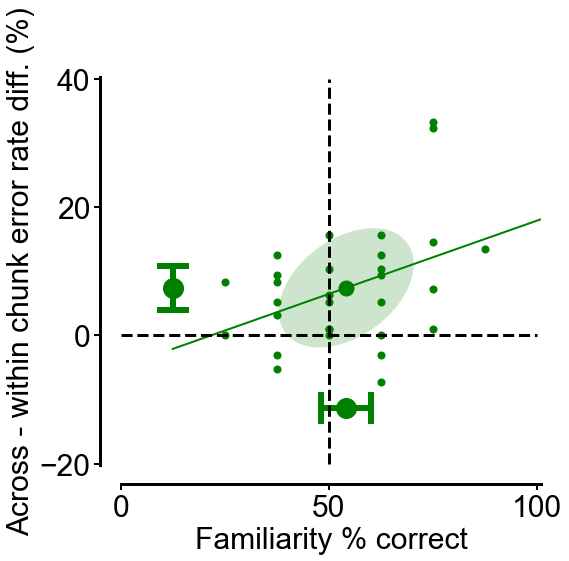

Correlation btw. familiarity and object effect 0.39818789268657945 0.0293079871191113 0.6695967454762188 0.03296332812107595


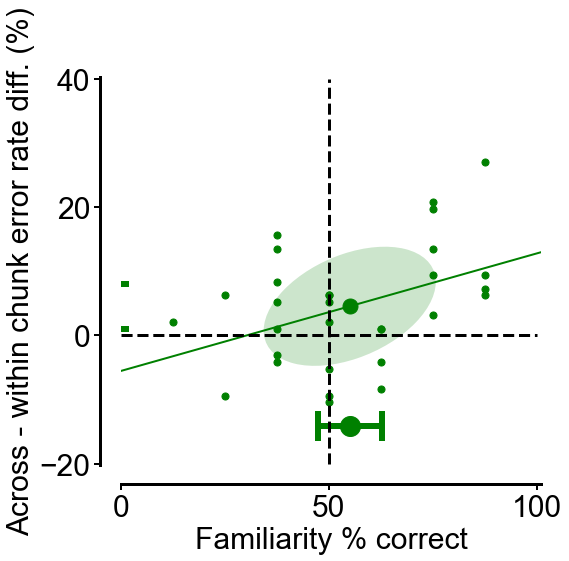

Correlation btw. familiarity and object effect 0.4082938298818266 0.025095527563490982 0.6762005268516855 0.04501333160101873


In [9]:
type_lab = ["m", "r", "c"]
crit=1.96
for fi,f in enumerate(fam_perf):
    d = data_RT_err[1][fi][0]
    pivot = pd.pivot_table(d, index=['name'], columns=['Code'], values=['error'], aggfunc=[np.mean])
    c = (pivot.values[:,2]-pivot.values[:,1])
    data = [
        [
            [[f[:,0]*100,c*100]]
        ]
    ]
    ScatterForCorrelation(data,
                        SpreadOfX = 0.1,
                        YError = 'CI',
                        NoStd = 1,
                        plotsize = [8,8],
                        axeslimitX = [[0],[100.0000001],[50]],
                        axeslimitY = [[-20],[40.0000001],[20]],
                        axisLabels = [['Familiarity % correct'],['Across - within chunk error rate diff. (%)']],
                        SameAxisLabel = True,
                        ConditionLabels = [],
                        SameConditionLabels = True,
                        SubplotTitles = [''],
                        SameSubplotTitles = False,
                        plotTitle = '',
                        ThresValue = [50,0],
                        SameThresValue = True,
                        RegressionLine = [True],
                        AxisTicks = [[],[]],
                        SameAxisTicks = True,
                        SaveFigName = figpath+'fam_chunk_corr'+type_lab[fi]+'.pdf',
                        Outliers = [],
                        SameErrorEllipseColor = True,
                        ErrorEllipse = {'color':['g','r'],'alpha':0.2},
                        axisTouching = True,
                        ErrorBar = {'ErrDist':[[0.1],[0.2]], 'ErrSize':0.5, 'ErrWid':6, 'sizedots':50, 'sizeMean':20, 'ErrColor':['g','r'], 'DotsColor':['g','r'],'OutlierDotsColor':'r','RegLineWid':2},
                        titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'30'},
                        LegendPos = {'LegendPosition':'upper left'},
                        FigureLayout = [1,1.3,1.8,0.85])

    # computing confidence intervals for the correlations
    r1,p1 = sc.pearsonr(f[:,0],c)
    # CIs in pearson
    r1_CU=np.tanh(np.arctanh(r1)+(1.03/np.sqrt(len(f)-3))*crit)
    r1_CL=np.tanh(np.arctanh(r1)-(1.03/np.sqrt(len(f)-3))*crit)

    print 'Correlation btw. familiarity and object effect', r1,p1,r1_CU,r1_CL
    np.savetxt(filepath+'results/exp1_fam_obj_'+type_lab[fi]+'.csv',np.vstack(((f[:,0],c))).T)

# Partial correlations btw, familiarity and chunk-based effect controlling for average performance

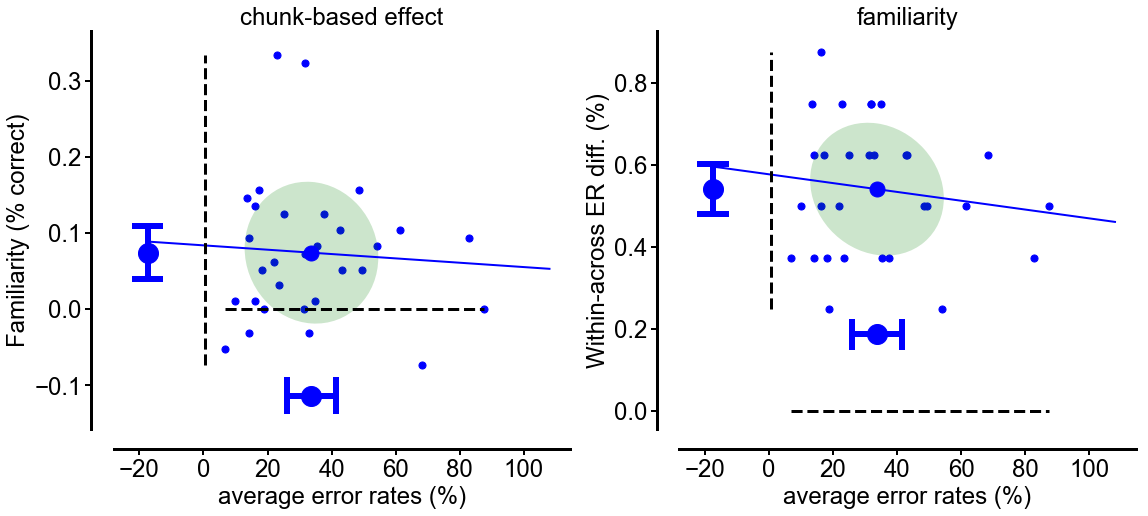

corr btw familiarity and object-based effect controlling for mean performance:  0.39393427361402317 0.03124486627048901 0.6668043025414921 0.027922998901239504


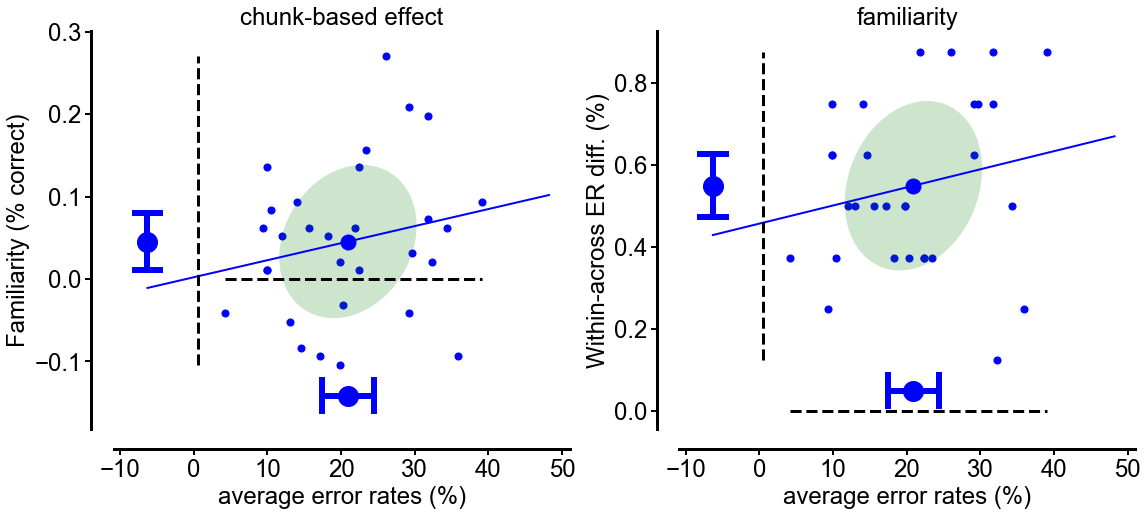

corr btw familiarity and object-based effect controlling for mean performance:  0.38278877599183914 0.036815851159185745 0.6594509110624266 0.014803820003926866


In [10]:
type_lab = ["m", "r", "c"]
crit=1.96
for fi,f in enumerate(fam_perf):
    d = data_RT_err[1][fi][0]
    pivot = pd.pivot_table(d, index=['name'], columns=['Code'], values=['error'], aggfunc=[np.mean])
    avg_er = np.mean(np.vstack((pivot.values[:,2],pivot.values[:,1])), axis=0)*100
    obj_er = pivot.values[:,2]-pivot.values[:,1]
    sl = f[:,0]
    data = [
        [
            [[avg_er,obj_er]]
        ],
        [
            [[avg_er,sl]]
        ]
    ]
    ScatterForCorrelation(data,
                        SpreadOfX = 0.1,
                        YError = 'CI',
                        NoStd = 1,
                        plotsize = [16,8],
                        axeslimitX = [],
                        axeslimitY = [],
                        axisLabels = [['average error rates (%)','average error rates (%)'],['Familiarity (% correct)','Within-across ER diff. (%)']],
                        SameAxisLabel = False,
                        ConditionLabels = [],
                        SameConditionLabels = True,
                        SubplotTitles = ['chunk-based effect','familiarity'],
                        SameSubplotTitles = False,
                        plotTitle = '',
                        ThresValue = [0.5,0],
                        SameThresValue = True,
                        RegressionLine = [True],
                        AxisTicks = [[],[]],
                        SameAxisTicks = True,
                        SaveFigName = [],
                        Outliers = [],
                        SameErrorEllipseColor = True,
                        ErrorEllipse = {'color':['g','r'],'alpha':0.2},
                        axisTouching = True,
                        ErrorBar = {'ErrDist':[[0.1],[0.3]], 'ErrSize':0.5, 'ErrWid':6, 'sizedots':50, 'sizeMean':20, 'ErrColor':['b','r'], 'DotsColor':['b','r'],'OutlierDotsColor':'r','RegLineWid':2},
                        titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'24'},
                        LegendPos = {'LegendPosition':'upper left'},
                        FigureLayout = [1,1.3,1.8,0.85])


    N = len(avg_er)
    xT = np.stack((np.ones(N), avg_er), axis=-1)
    inner = np.dot(np.linalg.inv(np.dot(xT.T,xT)), xT.T)
    regx = np.dot(inner,sl)
    regy = np.dot(inner,obj_er)
    resy = obj_er - np.dot(xT,regy)
    resx = sl - np.dot(xT,regx)

    r1,p1 = sc.pearsonr(resx,resy)
    r1_CU=np.tanh(np.arctanh(r1)+(1.03/np.sqrt(N-3))*crit)
    r1_CL=np.tanh(np.arctanh(r1)-(1.03/np.sqrt(N-3))*crit)
    print 'corr btw familiarity and object-based effect controlling for mean performance: ', r1,p1,r1_CU,r1_CL

    np.savetxt(filepath+'results/exp1_fam_obj_part_'+type_lab[fi]+'.csv',np.vstack(((resy,resx))).T)

# Analyzing only the trials in which there were two true pairs

m


median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.270938  1.127028  1.013854
2.0   1.563135  1.169393  1.164458
3.0   1.543740  1.258244  1.210287
4.0   1.382235  1.556150  2.736398
5.0   1.535257  1.385937  1.068200
6.0   1.070132  1.057045  1.084964
7.0   2.530850  1.418218  1.300423
8.0   1.819968  1.649032  1.535289
9.0   1.357878  1.043438  1.450994
10.0  1.086502  1.025915  1.067159
11.0  0.902320  0.821327  0.789794
12.0  2.096431  2.160208  1.336531
13.0  1.553117  1.146608  1.263480
14.0  1.172307  1.053303  0.920555
15.0  1.371174  2.476433  2.107631
16.0  1.375304  1.153506  1.276992
17.0  1.155765  1.076636  1.281938
18.0  1.764682  1.618259  1.432587
19.0  1.413724  1.540841  1.250073
20.0  1.188063  2.098778  1.325263
21.0  1.610285  2.697654  1.301802
22.0  1.223574  1.493448  1.466071
23.0  1.466586  1.413043  1.666109
24.0  1.434550  1.199089  1.210466
25.0  1.296450  1.284181  1.204813
26.0  1.186133  1.337902  1.231963
27.0  1.191833  1.311730  1.069781
28.0  2.026556  3.147435  2.808411
29.0  1.717004  1.603321  2.003468
30.0  1.908921  1.883657  1.839855

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.197137  1.148493  0.883141
2.0   1.430855  1.151721  1.143237
3.0   1.222913  1.130092  0.889009
4.0   1.263017  1.510376  1.162233
5.0   1.254625  1.086137  0.953635
6.0   0.853262  1.016919  0.959972
7.0   1.566121  1.131984  1.149098
8.0   1.155282  1.230115  1.311489
9.0   1.206350  1.019937  1.067192
10.0  1.132477  0.895079  0.927090
11.0  0.802608  0.651380  0.725806
12.0  1.371612  1.132392  1.169615
13.0  1.239884  0.959864  1.109881
14.0  1.065355  0.962992  0.968236
15.0  1.511454  1.262518  1.359314
16.0  1.266873  1.291177  1.097873
17.0  1.174410  1.159685  1.138967
18.0  1.352408  1.006493  1.236533
19.0  1.242019  1.150447  1.257455
20.0  1.114019  0.960006  0.798313
21.0  1.286184  1.183222  1.462099
22.0  1.250357  1.655048  1.068385
23.0  1.329652  1.143061  1.222812
24.0  1.034273  0.996388  0.982163
25.0  1.152630  0.952529  0.898299
26.0  1.067233  0.983827  1.063129
27.0  0.698275  1.081546  1.021758
28.0  1.503601  2.623771  2.443386
29.0  1.604441  1.465050  1.210296
30.0  1.271138  1.025087  1.198553

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.161963  0.952515  0.867780
2.0   1.070312  1.044434  0.927487
3.0   1.487444  1.124885  1.133531
4.0   1.005774  0.918643  1.091265
5.0   1.237658  0.929754  0.875906
6.0   1.239733  1.122530  1.219589
7.0   1.442394  0.996631  1.015006
8.0   1.335519  1.261656  1.182359
9.0   1.040720  0.979693  0.850398
10.0  0.988954  0.837874  0.764463
11.0  0.666258  0.696009  0.688180
12.0  1.239619  0.874648  0.873806
13.0  1.067970  0.929091  0.811560
14.0  1.005857  0.849860  0.854987
15.0  1.861438  1.320779  1.339144
16.0  1.043886  1.139432  0.895663
17.0  1.466785  1.229753  1.343415
18.0  1.148713  1.052826  0.956531
19.0  1.000162  1.079585  1.160255
20.0  1.099452  0.699387  0.854005
21.0  0.996472  1.091515  1.316594
22.0  0.976980  1.178602  1.502298
23.0  0.971330  0.865183  0.972038
24.0  1.066317  0.968478  1.039072
25.0  1.010936  0.710543  0.783238
26.0  0.914301  1.030307  1.093111
27.0  0.538188  0.815060  1.012361
28.0  1.318275  2.030175  1.949359
29.0  1.642848  1.058093  1.295983
30.0  1.059957  0.821197  0.960554

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.010406  0.727114  0.843982
2.0   1.005078  0.866779  0.929898
3.0   1.329484  0.971421  1.015440
4.0   0.956874  0.931643  1.623920
5.0   1.040238  0.899511  0.775532
6.0   1.149436  0.979016  1.090134
7.0   1.154948  0.860572  0.821095
8.0   1.329215  1.308991  1.223387
9.0   1.121228  0.859033  0.816723
10.0  1.112714  0.812121  0.848233
11.0  0.722226  0.670550  0.682754
12.0  0.981650  0.812225  0.749477
13.0  0.949891  0.869039  0.950595
14.0  0.986198  1.081458  0.782986
15.0  1.635772  1.201342  1.190802
16.0  1.114806  1.066579  0.789953
17.0  1.219862  1.205350  1.111098
18.0  1.263389  0.983151  0.942330
19.0  1.009393  1.069932  1.052542
20.0  0.906200  0.606141  0.680660
21.0  1.023750  1.121869  1.008625
22.0  1.048318  1.131091  0.931284
23.0  1.055059  0.885869  0.763704
24.0  1.093258  0.918226  0.953397
25.0  0.891356  0.696323  0.847635
26.0  0.875596  1.059285  0.929393
27.0  0.519805  0.555459  0.645701
28.0  1.222860  1.522919  1.879931
29.0  1.224751  1.021123  1.106689
30.0  1.081043  0.830967  0.838458

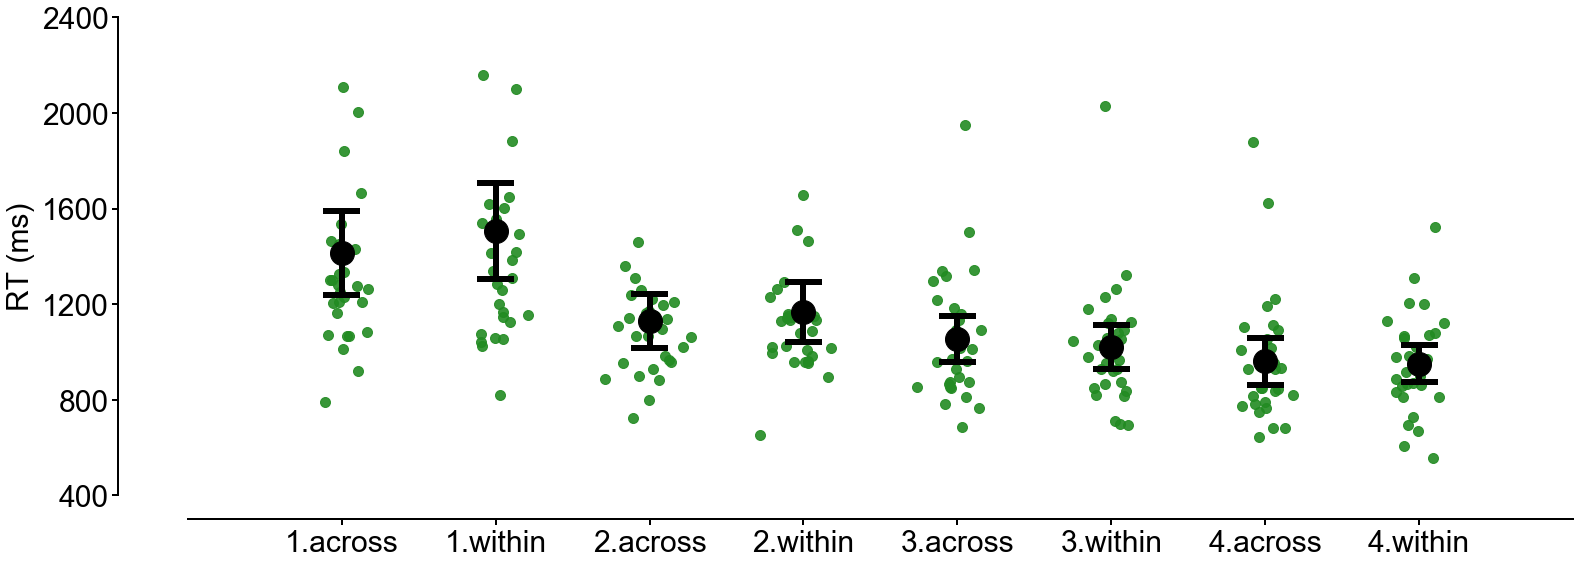

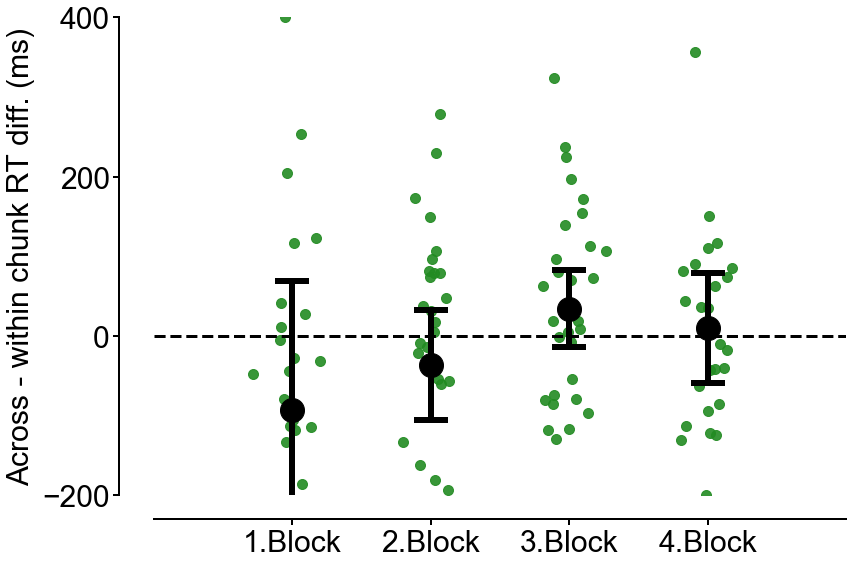

Testing chunk-based effect in the blocks:
Number of participants: 30
('difference between within and across trials', '1st block: T test for comparing rt', Ttest_relResult(statistic=-1.176054200467317, pvalue=0.24913765073344807), ' Cohen d:', 0.21838778247032078)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing rt', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing rt', Ttest_relResult(statistic=-1.0824424363997005, pvalue=0.2879746962324509), ' Cohen d:', 0.20100451428443433)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing rt', Ttest_relResult(statistic=-0.5875116631142897, pvalue=0.5614072217645191), ' Cohen d:', 0.10909817696497018)
('difference between within and across trials', '3rd block: T test for comparing rt', Ttest_relResult(statistic=1.439868931361022, pvalue=0.16061317691744187), ' Cohen d:', -0.26

/home/lengyel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars


median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.364287  1.040003  1.080015
2.0   1.364253  1.308087  1.321516
3.0   1.345225  0.955061  1.244991
4.0   2.241816  1.384897  1.515812
5.0   1.688013  1.326700  1.582328
6.0   1.222453  1.464508  1.336586
7.0   1.214759  1.225095  1.259858
8.0   1.230828  1.231450  1.189016
9.0   1.551859  1.793944  1.416884
11.0  1.207238  1.123576  0.964201
12.0  1.438354  1.478701  1.439345
13.0  1.323581  1.080792  1.230225
14.0  1.543302  1.601620  2.059674
15.0  1.928034  1.723842  1.298500
16.0  1.347764  1.202455  1.862495
17.0  1.058550  1.033610  1.072725
18.0  1.272218  1.066606  1.060928
19.0  1.582555  1.396593  1.316442
20.0  1.320276  1.667546  1.266598
21.0  1.265568  1.029800  1.217153
22.0  1.428411  1.430679  1.408146
23.0  1.244563  1.381777  1.351428
24.0  1.355066  1.098622  1.098992
25.0  1.171142  1.034735  1.078319
26.0  1.872523  1.738227  1.741577
27.0  1.491422  1.018937  1.091017
28.0  1.504856  1.248050  1.341546
29.0  1.091954  1.067197  1.031213
30.0  2.051467  1.686564  1.351202
31.0  1.231790  1.570882  1.264145

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.321875  0.849558  0.895134
2.0   1.120423  1.160856  1.027446
3.0   0.931432  0.926826  0.903455
4.0   1.556771  1.199584  1.038780
5.0   1.216822  1.529651  1.143772
6.0   1.212490  1.161589  1.067141
7.0   1.334169  1.204691  1.158701
8.0   1.176232  1.117712  1.023305
9.0   1.244193  1.208013  1.264728
11.0  1.178211  0.956579  0.966929
12.0  1.231023  1.192955  1.277588
13.0  1.074866  1.062603  0.868301
14.0  1.489584  1.606121  1.709569
15.0  1.343250  1.187009  1.201628
16.0  1.111676  1.025279  1.111724
17.0  0.927490  0.866114  0.860004
18.0  1.166289  0.875667  0.932747
19.0  1.165714  0.879448  0.850164
20.0  1.056331  0.973974  1.424835
21.0  1.032423  0.839442  0.878245
22.0  1.083877  0.925318  0.970697
23.0  1.151476  1.179582  1.153904
24.0  1.220154  0.857085  0.878612
25.0  1.053815  0.849263  0.840726
26.0  1.328353  1.224259  1.487311
27.0  1.107555  1.009698  0.902797
28.0  1.246979  1.040703  0.928397
29.0  1.162224  0.808333  0.844976
30.0  1.213369  1.069151  1.002925
31.0  1.102962  0.925877  0.901036

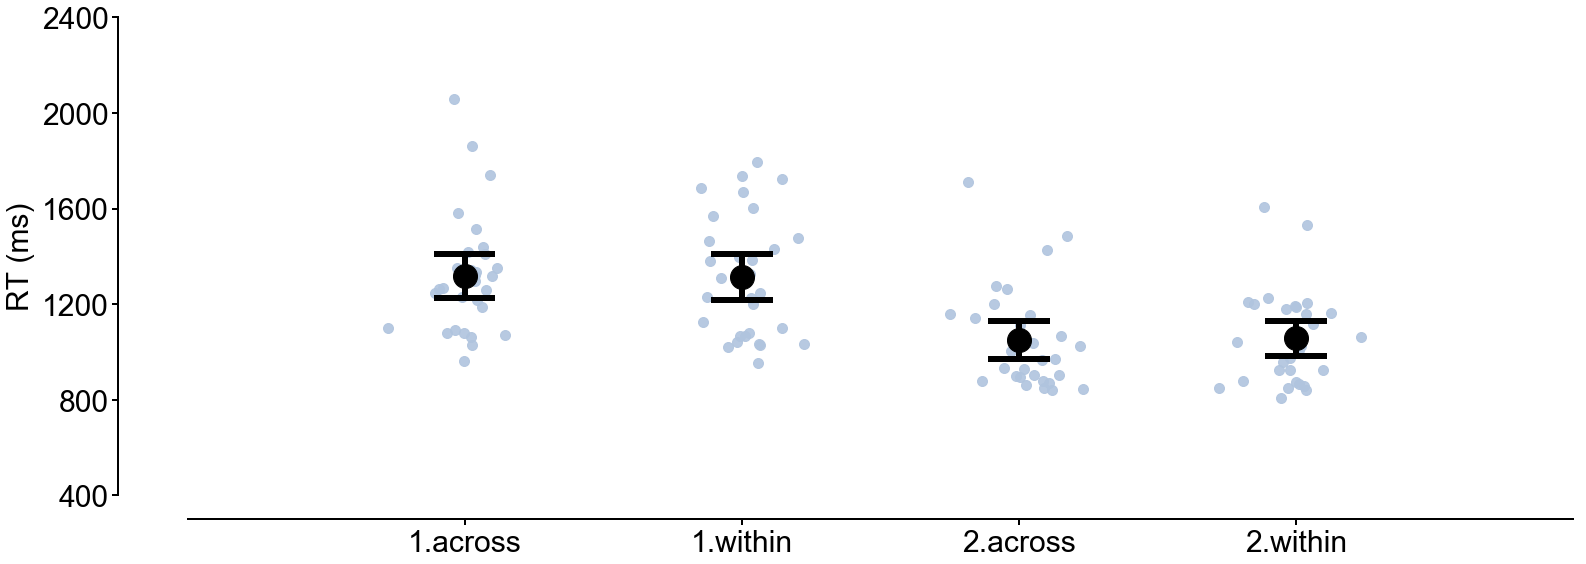

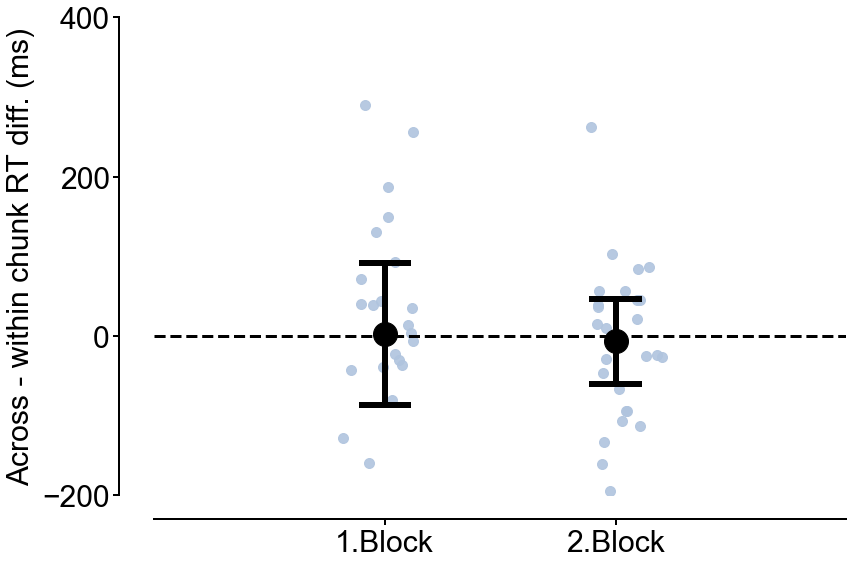

Testing chunk-based effect in the blocks:
Number of participants: 30
('difference between within and across trials', '1st block: T test for comparing rt', Ttest_relResult(statistic=0.06331269638976948, pvalue=0.9499518947945103), ' Cohen d:', -0.011756872566999255)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing rt', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing rt', Ttest_relResult(statistic=-0.25215030072399025, pvalue=0.8027034250545473), ' Cohen d:', 0.04682313536438669)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing rt', Ttest_relResult(statistic=0.1677871721785348, pvalue=0.8679153582011581), ' Cohen d:', -0.031157295679464247)


median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.238496  1.191387  1.362943
2.0   1.182306  1.257128  1.353172
3.0   1.004954  0.999081  1.016872
4.0   1.226690  0.983581  1.111549
5.0   1.075845  1.041165  1.106091
6.0   1.742928  1.186188  1.242082
7.0   1.211596  1.195168  1.151121
8.0   1.032105  1.109573  1.014094
9.0   1.390947  0.985256  0.990039
10.0  1.261064  1.429298  1.391976
11.0  1.034885  0.967106  1.321903
12.0  1.432341  1.289692  1.509027
13.0  1.467416  1.170411  1.057595
14.0  1.316744  1.052191  1.183995
15.0  1.148141  1.095231  1.317859
16.0  1.755630  1.862292  1.586339
17.0  1.491692  1.084233  1.303689
18.0  1.244166  1.018539  0.968711
19.0  1.638502  1.409396  1.558219
20.0  1.874629  1.375413  1.377495

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.201491  1.043363  1.176091
2.0   1.138628  1.148140  1.015663
3.0   0.957012  0.817593  1.086007
4.0   0.982996  0.941697  0.873355
5.0   1.062953  0.829097  0.835811
6.0   1.207204  0.904196  1.066993
7.0   1.086513  0.894559  0.854604
8.0   0.980882  0.854631  0.976660
9.0   1.058869  0.792619  0.792479
10.0  1.402322  1.051324  0.994243
11.0  1.082314  0.758146  0.801124
12.0  1.221250  1.229081  1.187155
13.0  1.156036  0.952869  0.982060
14.0  1.006794  1.173168  1.210440
15.0  1.200009  0.941734  1.154884
16.0  1.495927  1.120300  1.153891
17.0  1.117343  0.995230  1.181994
18.0  1.156382  0.806722  0.969838
19.0  1.252332  1.032493  1.061884
20.0  1.759915  1.283317  1.098137

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   1.106851  0.855791  0.887992
2.0   1.156299  1.116022  1.040168
3.0   0.849866  0.803546  0.673422
4.0   0.859391  0.936870  0.721282
5.0   0.984024  0.795797  0.882297
6.0   1.193960  0.792396  0.745613
7.0   1.014730  0.808850  0.808933
8.0   0.973994  0.866926  0.975095
9.0   0.812961  0.740919  0.728710
10.0  1.000713  0.987850  0.806252
11.0  1.036536  0.736456  0.865606
12.0  1.226138  1.142953  1.198923
13.0  1.250110  0.945520  1.046040
14.0  1.062418  1.187030  0.984349
15.0  0.960544  0.808364  0.837044
16.0  1.455156  0.884120  0.951685
17.0  1.031593  0.928106  1.059557
18.0  1.253671  0.937089  1.203353
19.0  1.017004  0.841770  0.957738
20.0  1.202716  0.947463  1.158406

median                    
            rt                    
Code       0.0       1.0       2.0
name                              
1.0   0.910649  0.721619  0.805978
2.0   1.037473  1.025181  1.094842
3.0   0.938308  0.719630  0.815311
4.0   0.767184  0.695056  0.786456
5.0   0.907863  0.922232  0.712008
6.0   1.191679  0.754949  0.907570
7.0   0.859809  0.707128  0.848038
8.0   0.837008  0.885031  0.791050
9.0   0.766209  0.699379  0.724556
10.0  0.955548  0.885988  1.081491
11.0  0.977187  0.700176  0.796034
12.0  1.298558  1.003525  1.056590
13.0  1.352211  0.758412  0.883167
14.0  0.963721  0.938293  0.719318
15.0  0.998467  0.958441  0.891512
16.0  1.238714  0.904011  0.953031
17.0  1.070236  0.929935  0.978117
18.0  0.973766  0.733592  0.805181
19.0  1.105492  0.808551  0.858877
20.0  1.000882  0.807455  1.044520

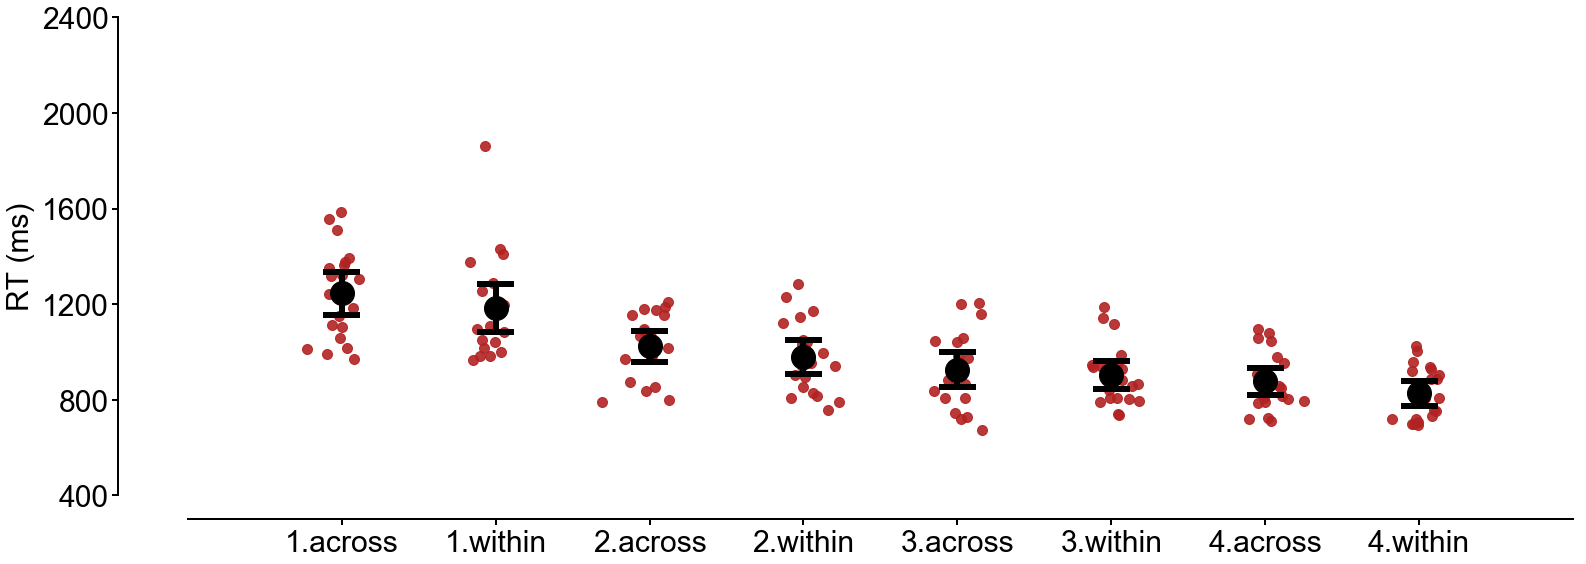

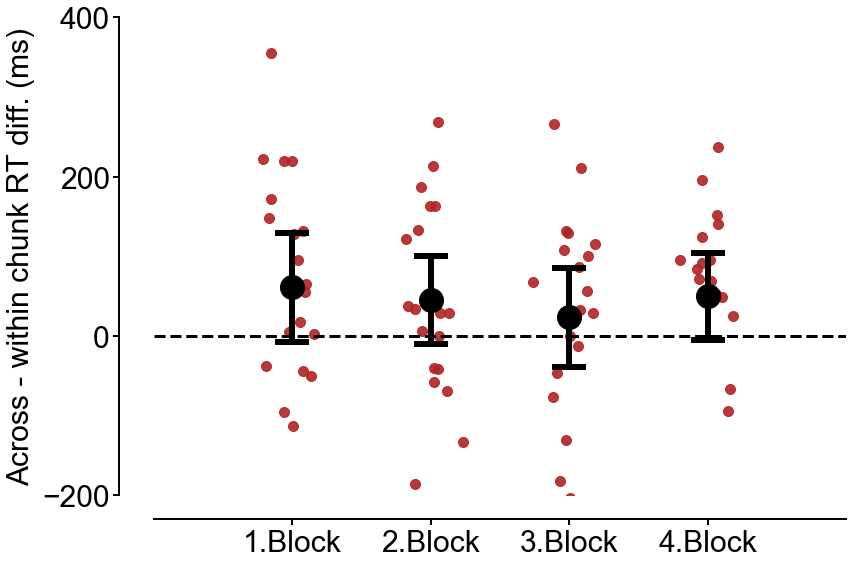

Testing chunk-based effect in the blocks:
Number of participants: 20
('difference between within and across trials', '1st block: T test for comparing rt', Ttest_relResult(statistic=1.8767924044636133, pvalue=0.07599076901274107), ' Cohen d:', -0.43056570679271605)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing rt', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing rt', Ttest_relResult(statistic=1.7051213287330382, pvalue=0.10446836248104052), ' Cohen d:', -0.39118166096963736)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing rt', Ttest_relResult(statistic=0.40232231126688783, pvalue=0.6919370789141759), ' Cohen d:', -0.09229906829179367)
('difference between within and across trials', '3rd block: T test for comparing rt', Ttest_relResult(statistic=0.7877247838662452, pvalue=0.440574831344804), ' Cohen d:', -0.

mean                
       error                
Code     0.0     1.0     2.0
name                        
1.0   0.1250  0.2500  0.2500
2.0   0.3125  0.0625  0.0625
3.0   0.0625  0.0625  0.1875
4.0   0.0000  0.0000  0.5625
5.0   0.1250  0.0625  0.1875
6.0   0.3125  0.6875  0.5625
7.0   0.5000  0.3125  0.4375
8.0   0.1875  0.1250  0.1250
9.0   0.0000  0.1875  0.1875
10.0  0.1250  0.1875  0.3125
11.0  0.0000  0.1250  0.1875
12.0  0.9375  0.9375  0.8125
13.0  0.1250  0.2500  0.3125
14.0  0.1875  0.3125  0.3750
15.0  0.0625  0.4375  0.4375
16.0  0.0625  0.1875  0.5000
17.0  0.0625  0.2500  0.2500
18.0  0.1250  0.3750  0.5625
19.0  0.0000  0.3125  0.2500
20.0  0.0625  0.4375  0.6250
21.0  0.0625  0.6875  0.8750
22.0  0.0625  0.2500  0.3125
23.0  0.1875  0.1250  0.1875
24.0  0.0000  0.2500  0.3125
25.0  0.1875  0.2500  0.5000
26.0  0.0625  0.5000  0.4375
27.0  0.1875  0.5625  0.6250
28.0  0.0000  0.2500  0.3750
29.0  0.2500  0.1875  0.4375
30.0  0.1250  0.2500  0.0625

mean                
       error                
Code     0.0     1.0     2.0
name                        
1.0   0.1250  0.2500  0.3125
2.0   0.1250  0.0625  0.0625
3.0   0.3125  0.0000  0.0625
4.0   0.0000  0.0625  0.1250
5.0   0.1250  0.1875  0.1875
6.0   0.2500  0.5625  0.6250
7.0   0.5000  0.1250  0.3750
8.0   0.0000  0.1875  0.0625
9.0   0.0000  0.0625  0.0625
10.0  0.0625  0.0625  0.0625
11.0  0.0000  0.0625  0.0625
12.0  0.1875  0.1875  0.0000
13.0  0.0625  0.2500  0.1250
14.0  0.0625  0.3125  0.1875
15.0  0.1875  0.4375  0.5000
16.0  0.0000  0.2500  0.1875
17.0  0.1250  0.0000  0.0625
18.0  0.1875  0.2500  0.1875
19.0  0.0625  0.2500  0.2500
20.0  0.6250  0.5625  0.6250
21.0  0.0625  0.2500  0.1250
22.0  0.0625  0.2500  0.4375
23.0  0.2500  0.2500  0.1250
24.0  0.1250  0.3125  0.0625
25.0  0.0625  0.4375  0.2500
26.0  0.2500  0.4375  0.3125
27.0  0.5000  0.6250  0.6250
28.0  0.0000  0.5625  0.3125
29.0  0.1875  0.2500  0.1250
30.0  0.0000  0.0625  0.1875

mean                
       error                
Code     0.0     1.0     2.0
name                        
1.0   0.4375  0.1250  0.2500
2.0   0.1875  0.0000  0.1875
3.0   0.3125  0.0000  0.0625
4.0   0.0625  0.1875  0.1250
5.0   0.1875  0.0625  0.1250
6.0   0.4375  0.3125  0.4375
7.0   0.3750  0.0625  0.2500
8.0   0.1250  0.1250  0.1250
9.0   0.0625  0.0000  0.0625
10.0  0.0000  0.0000  0.0625
11.0  0.0000  0.1875  0.0625
12.0  0.0000  0.0000  0.0625
13.0  0.1875  0.1875  0.0625
14.0  0.1250  0.1250  0.0625
15.0  0.0000  0.1875  0.3125
16.0  0.0000  0.2500  0.0625
17.0  0.3125  0.1875  0.1250
18.0  0.0625  0.0625  0.1875
19.0  0.1250  0.1250  0.0625
20.0  0.1875  0.3125  0.0000
21.0  0.0625  0.0625  0.1250
22.0  0.0625  0.5000  0.3750
23.0  0.3125  0.2500  0.2500
24.0  0.0625  0.3125  0.1250
25.0  0.1875  0.0000  0.0000
26.0  0.0000  0.3750  0.3750
27.0  0.5625  0.4375  0.8125
28.0  0.0000  0.1875  0.1250
29.0  0.1250  0.1875  0.1250
30.0  0.1250  0.1250  0.1250

mean                
       error                
Code     0.0     1.0     2.0
name                        
1.0   0.5000  0.1875  0.0000
2.0   0.1250  0.1250  0.1250
3.0   0.0000  0.0625  0.0625
4.0   0.0625  0.1875  0.1875
5.0   0.0625  0.1250  0.2500
6.0   0.5625  0.5000  0.1875
7.0   0.3750  0.2500  0.1875
8.0   0.0000  0.0000  0.0000
9.0   0.0625  0.0625  0.0000
10.0  0.0000  0.1875  0.0000
11.0  0.1250  0.0625  0.0625
12.0  0.0625  0.0000  0.0625
13.0  0.0000  0.0625  0.1250
14.0  0.0000  0.0625  0.1250
15.0  0.0625  0.1875  0.1250
16.0  0.0625  0.1250  0.2500
17.0  0.3750  0.1875  0.2500
18.0  0.1250  0.1250  0.1875
19.0  0.1875  0.1875  0.1875
20.0  0.4375  0.1875  0.2500
21.0  0.0625  0.1250  0.0000
22.0  0.0000  0.3125  0.4375
23.0  0.1250  0.1875  0.0625
24.0  0.1875  0.1875  0.1250
25.0  0.0000  0.0625  0.0625
26.0  0.0625  0.5625  0.3750
27.0  0.7500  0.6250  0.6875
28.0  0.0000  0.2500  0.1250
29.0  0.0625  0.0000  0.1250
30.0  0.0625  0.0625  0.0625

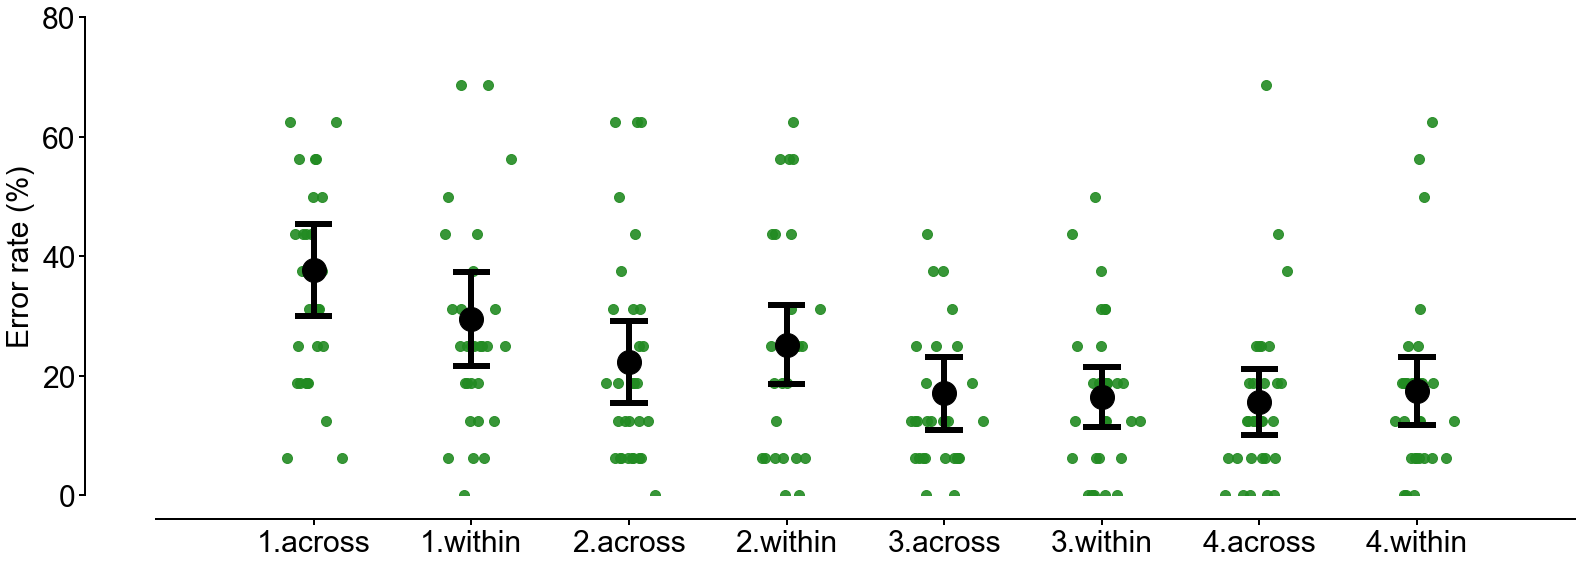

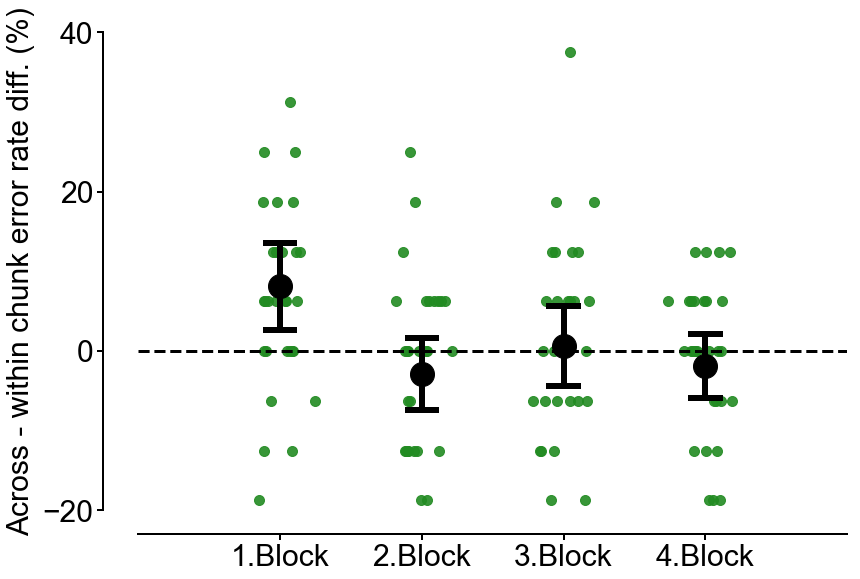

Testing chunk-based effect in the blocks:
Number of participants: 30
('difference between within and across trials', '1st block: T test for comparing err', Ttest_relResult(statistic=3.0285602466865926, pvalue=0.005120274151671154), ' Cohen d:', -0.5623895191980425)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing err', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing err', Ttest_relResult(statistic=-1.3156048335095591, pvalue=0.1986133152404046), ' Cohen d:', 0.2443016844659216)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing err', Ttest_relResult(statistic=3.073944669493919, pvalue=0.004568749306965209), ' Cohen d:', -0.5708171949392192)
('difference between within and across trials', '3rd block: T test for comparing err', Ttest_relResult(statistic=0.25227567044613913, pvalue=0.802607459396212), ' Cohen d:', 

mean                
       error                
Code     0.0     1.0     2.0
name                        
1.0   0.0000  0.3125  0.1875
2.0   0.0000  0.0625  0.0625
3.0   0.0625  0.1250  0.0625
4.0   0.2500  0.0625  0.1250
5.0   0.1250  0.2500  0.4375
6.0   0.1250  0.2500  0.4375
7.0   0.1875  0.2500  0.3125
8.0   0.1250  0.3125  0.1875
9.0   0.1250  0.0000  0.3125
11.0  0.0000  0.0625  0.1875
12.0  0.3125  0.1250  0.4375
13.0  0.3750  0.2500  0.3125
14.0  0.0000  0.0625  0.1250
15.0  0.0000  0.3125  0.2500
16.0  0.0625  0.1875  0.2500
17.0  0.0625  0.0000  0.1250
18.0  0.0625  0.1250  0.1875
19.0  0.1250  0.2500  0.0625
20.0  0.0625  0.4375  0.5000
21.0  0.0625  0.1250  0.1250
22.0  0.0000  0.0000  0.1250
23.0  0.1250  0.3125  0.2500
24.0  0.3125  0.3750  0.3125
25.0  0.0000  0.1875  0.1875
26.0  0.1875  0.1250  0.3125
27.0  0.0625  0.1250  0.1250
28.0  0.0000  0.0625  0.1250
29.0  0.0000  0.1250  0.1875
30.0  0.1875  0.0625  0.0625
31.0  0.0625  0.3750  0.3750

mean                
       error                
Code     0.0     1.0     2.0
name                        
1.0   0.1250  0.2500  0.0000
2.0   0.0625  0.1250  0.0625
3.0   0.0625  0.0625  0.0000
4.0   0.1875  0.1250  0.0625
5.0   0.0000  0.1875  0.2500
6.0   0.0000  0.2500  0.2500
7.0   0.1875  0.1250  0.1250
8.0   0.0625  0.2500  0.1250
9.0   0.1250  0.0000  0.2500
11.0  0.0000  0.0000  0.1250
12.0  0.3125  0.3125  0.1250
13.0  0.3125  0.1250  0.0625
14.0  0.0000  0.0000  0.0000
15.0  0.1250  0.0625  0.1250
16.0  0.0625  0.1875  0.2500
17.0  0.0625  0.0625  0.1250
18.0  0.0625  0.0625  0.0000
19.0  0.1250  0.1250  0.2500
20.0  0.0000  0.1250  0.2500
21.0  0.0625  0.0000  0.0625
22.0  0.0000  0.1250  0.0625
23.0  0.0625  0.2500  0.1875
24.0  0.1875  0.1875  0.0000
25.0  0.1250  0.1875  0.1875
26.0  0.1250  0.0625  0.0625
27.0  0.1875  0.0000  0.0625
28.0  0.0625  0.1250  0.0000
29.0  0.1875  0.0000  0.1250
30.0  0.1250  0.0000  0.0625
31.0  0.0625  0.3125  0.3125

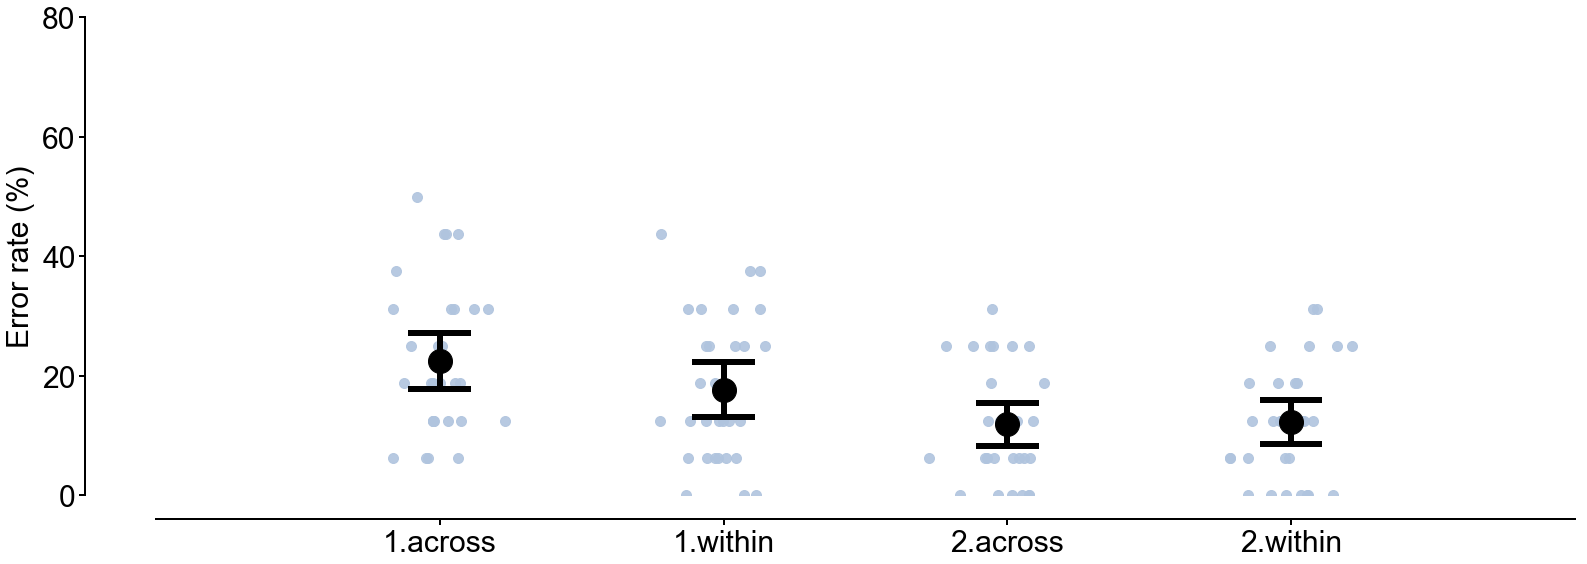

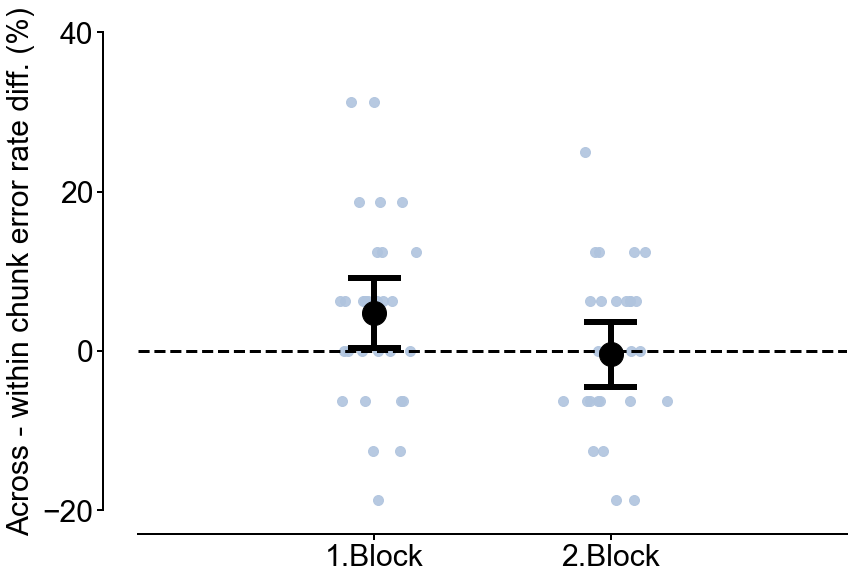

Testing chunk-based effect in the blocks:
Number of participants: 30
('difference between within and across trials', '1st block: T test for comparing err', Ttest_relResult(statistic=2.2460458879724614, pvalue=0.03248759608329654), ' Cohen d:', -0.4170802507282229)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing err', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing err', Ttest_relResult(statistic=-0.2097762374596594, pvalue=0.8353091217065696), ' Cohen d:', 0.038954469356580985)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing err', Ttest_relResult(statistic=2.0614817284575584, pvalue=0.048321867128491125), ' Cohen d:', -0.3828075467117396)


mean                
       error                
Code     0.0     1.0     2.0
name                        
1.0   0.0625  0.1875  0.3125
2.0   0.1250  0.1250  0.1875
3.0   0.0625  0.3125  0.3125
4.0   0.2500  0.0625  0.0000
5.0   0.0625  0.0625  0.1250
6.0   0.1875  0.1250  0.2500
7.0   0.2500  0.1250  0.1250
8.0   0.0000  0.0000  0.3125
9.0   0.1250  0.0000  0.1875
10.0  0.1875  0.3125  0.2500
11.0  0.2500  0.0625  0.3125
12.0  0.2500  0.1250  0.2500
13.0  0.0625  0.0625  0.1875
14.0  0.0000  0.1250  0.0000
15.0  0.0625  0.3125  0.3125
16.0  0.1875  0.0000  0.1250
17.0  0.1250  0.1250  0.3750
18.0  0.0000  0.0000  0.0000
19.0  0.0625  0.0625  0.1875
20.0  0.1250  0.2500  0.3125

mean                
       error                
Code     0.0     1.0     2.0
name                        
1.0   0.2500  0.1875  0.0625
2.0   0.0000  0.1875  0.0625
3.0   0.1875  0.1875  0.2500
4.0   0.0000  0.0625  0.1250
5.0   0.0625  0.0625  0.0625
6.0   0.3125  0.0000  0.0625
7.0   0.1875  0.0625  0.0000
8.0   0.0625  0.0625  0.0625
9.0   0.0625  0.0625  0.0625
10.0  0.3125  0.2500  0.3125
11.0  0.1875  0.1250  0.1875
12.0  0.3750  0.0625  0.2500
13.0  0.2500  0.0000  0.0625
14.0  0.0000  0.0000  0.0625
15.0  0.0625  0.1250  0.1250
16.0  0.0625  0.0000  0.0625
17.0  0.0625  0.1250  0.3125
18.0  0.0625  0.0625  0.0000
19.0  0.0625  0.0000  0.0625
20.0  0.1875  0.0000  0.1875

mean                
       error                
Code     0.0     1.0     2.0
name                        
1.0   0.2500  0.1875  0.1250
2.0   0.0625  0.1875  0.2500
3.0   0.3125  0.0625  0.1875
4.0   0.1250  0.0625  0.0625
5.0   0.0000  0.0000  0.1250
6.0   0.3750  0.1250  0.1875
7.0   0.0625  0.0625  0.1875
8.0   0.0000  0.0625  0.0625
9.0   0.0625  0.0000  0.0000
10.0  0.0625  0.1250  0.4375
11.0  0.1875  0.0625  0.0000
12.0  0.0000  0.0000  0.3125
13.0  0.3750  0.1250  0.1250
14.0  0.0000  0.0625  0.1250
15.0  0.0000  0.0625  0.1875
16.0  0.1250  0.0625  0.0000
17.0  0.0000  0.1875  0.1250
18.0  0.0000  0.0625  0.0625
19.0  0.1875  0.0000  0.1875
20.0  0.1250  0.0000  0.0625

mean                
       error                
Code     0.0     1.0     2.0
name                        
1.0   0.0625  0.0000  0.1875
2.0   0.0000  0.1875  0.1250
3.0   0.1250  0.1250  0.1250
4.0   0.0000  0.0000  0.0000
5.0   0.1250  0.0000  0.1250
6.0   0.2500  0.1250  0.1250
7.0   0.1250  0.0625  0.1250
8.0   0.0000  0.0000  0.0000
9.0   0.1250  0.0000  0.0625
10.0  0.0625  0.2500  0.2500
11.0  0.0625  0.0000  0.0000
12.0  0.1875  0.0000  0.1250
13.0  0.3125  0.0000  0.0000
14.0  0.0625  0.1250  0.1250
15.0  0.0625  0.1250  0.0625
16.0  0.1875  0.1250  0.0000
17.0  0.1875  0.0625  0.1250
18.0  0.0000  0.0000  0.0625
19.0  0.1875  0.0000  0.0625
20.0  0.0625  0.0000  0.0625

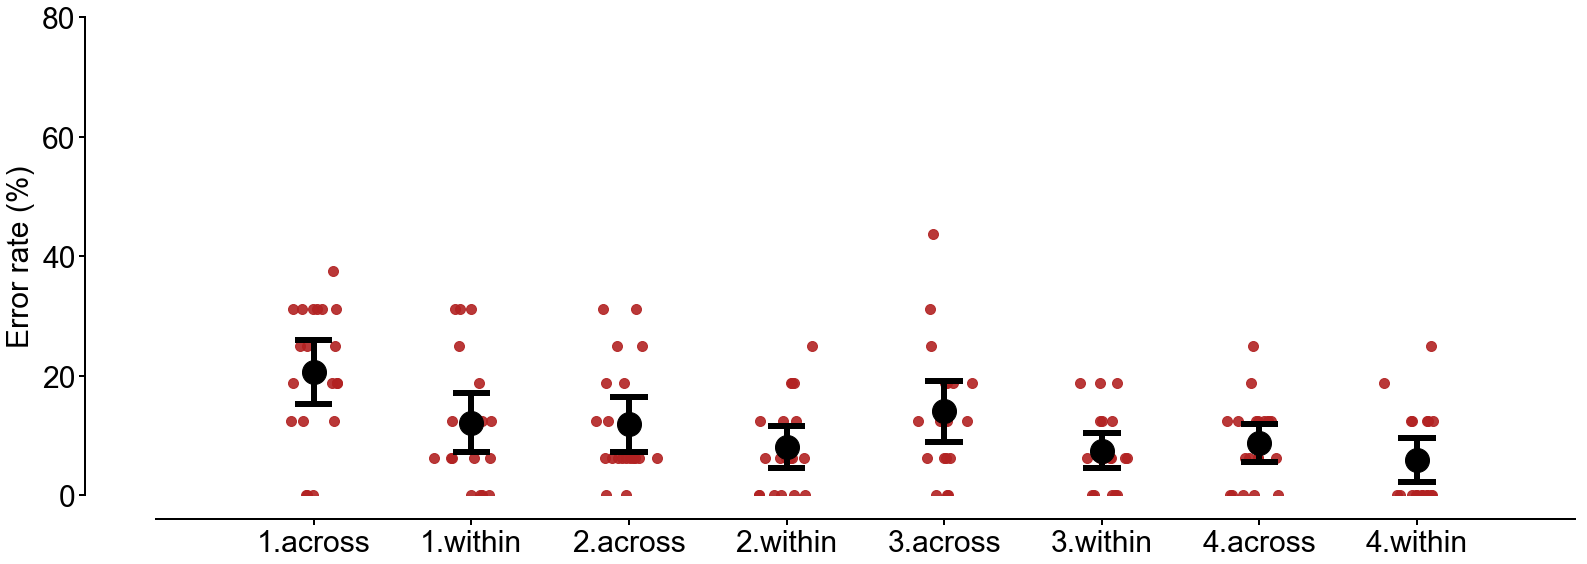

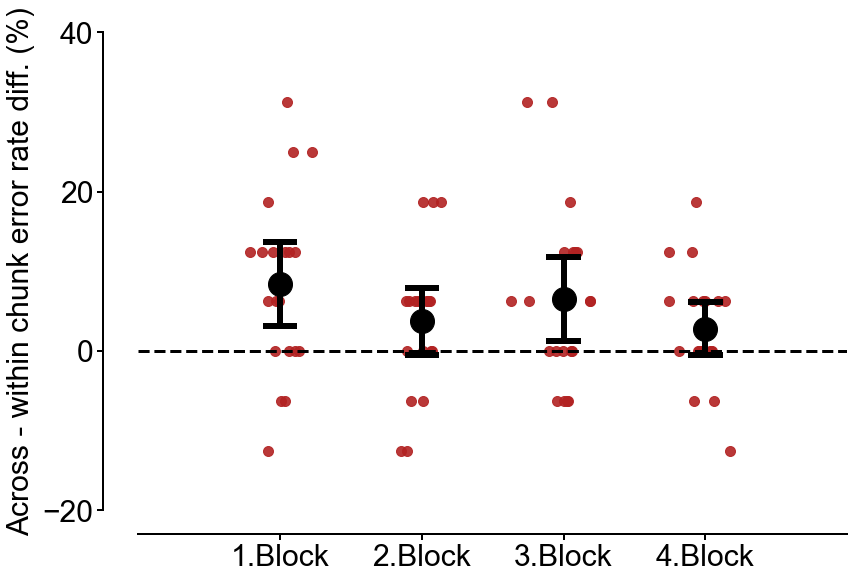

Testing chunk-based effect in the blocks:
Number of participants: 20
('difference between within and across trials', '1st block: T test for comparing err', Ttest_relResult(statistic=3.3274528465544284, pvalue=0.0035394144753656083), ' Cohen d:', -0.7633700367119739)
('difference between chunk-based effect in the 1st and', '1st blocks: T test for comparing err', Ttest_relResult(statistic=nan, pvalue=nan), ' Cohen d:', nan)
('difference between within and across trials', '2nd block: T test for comparing err', Ttest_relResult(statistic=1.8777042354631597, pvalue=0.07585978699164081), ' Cohen d:', -0.4307748951706429)
('difference between chunk-based effect in the 1st and', '2nd blocks: T test for comparing err', Ttest_relResult(statistic=1.5607361839521232, pvalue=0.13508811384056693), ' Cohen d:', -0.35805743701971643)
('difference between within and across trials', '3rd block: T test for comparing err', Ttest_relResult(statistic=2.6217679035556998, pvalue=0.016786121475755065), ' Cohen 

In [11]:
type_lab = ["m", "r", "c"]
colors = ['forestgreen', 'lightsteelblue', 'firebrick']
plot_name = ['sumstat_chunk_main', 'sumstat_chunk_rep', 'sumstat_chunk_cont']
behave_lab = ["rt","err"]
scale = [1000,100]
axlimit1 = [[[400],[2400.0000001],[400]], [[0],[80.0000001],[20]]]
axlimit2 = [[[-200],[400.0000001],[200]], [[-20],[40.0000001],[20]]]
axlabel1 = ['RT (ms)', 'Error rate (%)']
axlabel2 = ['Across - within chunk RT diff. (ms)', 'Across - within chunk error rate diff. (%)']
block_lab = ['1st','2nd','3rd','4th']
for t,types in enumerate(data_RT_err):
    print(type_lab[t])
    for g,group in enumerate(types):
        pivots = []
        for d,dataset in enumerate(group):
            if t==0:
                pivot = pd.pivot_table(dataset[dataset["pair2"]<9], index=['name'], columns=['Code'], values=['rt'], aggfunc=[np.median])
            else:
                pivot = pd.pivot_table(dataset[dataset["pair2"]<9], index=['name'], columns=['Code'], values=['error'], aggfunc=[np.mean])
            display(pivot)
            pivots.append(pivot)      
        
        ## plots
        blocknum = [0,0,1,1,2,2,3,3]
        condnum = [2,1,2,1,2,1,2,1]
        All = [pivots[i].values[:,j]*scale[t] for i,j in zip(blocknum[:len(pivots*2)],condnum[:len(pivots*2)])]
        ErrorBarsForMeans([[All]],
                  SpreadOfX = 0.1,
                  YError = 'CI',
                  plotsize = [22,8],
                  axeslimit = axlimit1[t],
                  axisLabels = [[''],[axlabel1[t]]],
                  SameAxisLabel = False,
                  SubplotTitles = [''],
                  SameSubplotTitles = False,
                  plotTitle = '',
                  ThresValue = [],
                  AxisTicks = [['1.across','1.within','2.across','2.within','3.across','3.within','4.across','4.within'],[]],
                  SameAxisTicks = True,
                  SaveFigName = figpath+plot_name[g]+'_'+behave_lab[t]+'.pdf',
                  Outliers = [],
                  axisWidth = 2,
                  axisTouching = True,
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                  axisFont = {'fontname':'Arial', 'size':'30'},
                  ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10,
                              'ErrColor':['k','k','k','k','k','k','k','k'],
                              'DotsColor':[colors[g],colors[g],colors[g],colors[g],colors[g],colors[g],colors[g],colors[g]],
                              'DotsTransp':0.9,'OutlierDotsColor':'r'},
                  FigureLayout = [1,6,6,0.95])
        
        AllDiff = [pivots[i].values[:,2]*scale[t] - pivots[i].values[:,1]*scale[t] for i in range(len(pivots))]
        ErrorBarsForMeans([[AllDiff]],
                  SpreadOfX = 0.1,
                  YError = 'CI',
                  plotsize = [12,8],
                  axeslimit = axlimit2[t],
                  axisLabels = [[''],[axlabel2[t]]],
                  SameAxisLabel = False,
                  SubplotTitles = [''],
                  SameSubplotTitles = False,
                  plotTitle = '',
                  ThresValue = [0,0],
                  AxisTicks = [['1.Block','2.Block','3.Block','4.Block'],[]],
                  SameAxisTicks = True,
                  SaveFigName = figpath+plot_name[g]+'_diff_'+behave_lab[t]+'1.pdf',
                  Outliers = [],
                  axisWidth = 2,
                  axisTouching = True,
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                  axisFont = {'fontname':'Arial', 'size':'30'},
                  ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10,
                              'ErrColor':['k','k','k','k'],
                              'DotsColor':[colors[g],colors[g],colors[g],colors[g]],
                              'DotsTransp':0.9,'OutlierDotsColor':'r'},
                  FigureLayout = [1,6,6,0.95])
        
        np.savetxt(filepath+'results/exp1_avg_'+behave_lab[t]+'_'+type_lab[g]+'1.csv',np.vstack((All)).T)
        np.savetxt(filepath+'results/exp1_obj_'+behave_lab[t]+'_'+type_lab[g]+'1.csv',np.vstack((AllDiff)).T)
        
        print("Testing chunk-based effect in the blocks:")
        print "Number of participants:",pivots[0].values.shape[0]
        diff_score0 = pivots[0].values[:,2]-pivots[0].values[:,1]
        for pi,p in enumerate(pivots):
            diff_score = p.values[:,2]-p.values[:,1]
            print('difference between within and across trials',block_lab[pi]+' block: T test for comparing '+behave_lab[t], 
                  sc.ttest_rel(p.values[:,2],p.values[:,1]),
                  ' Cohen d:',
                  (0-np.mean(diff_score))/np.std(diff_score))
            print('difference between chunk-based effect in the 1st and', block_lab[pi]+' blocks: T test for comparing '+behave_lab[t], 
                  sc.ttest_rel(diff_score0,diff_score),
                  ' Cohen d:',
                  (0-np.mean(diff_score0-diff_score))/np.std(diff_score0-diff_score))

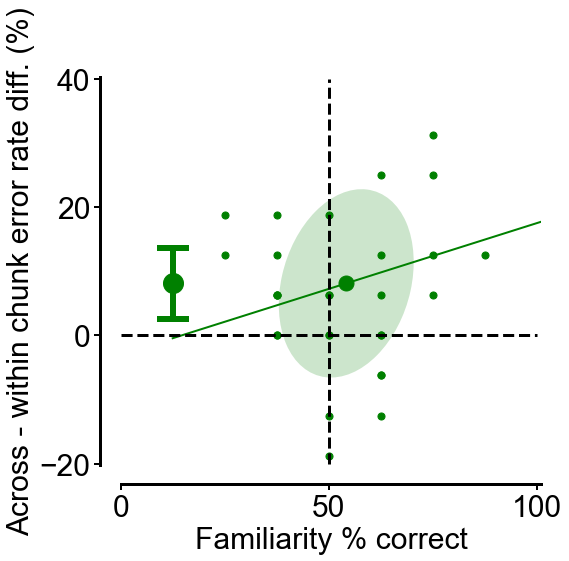

Correlation btw. familiarity and object effect 0.2264370216632798 0.22887875892767334 0.5503958062820202 -0.1567836037213488


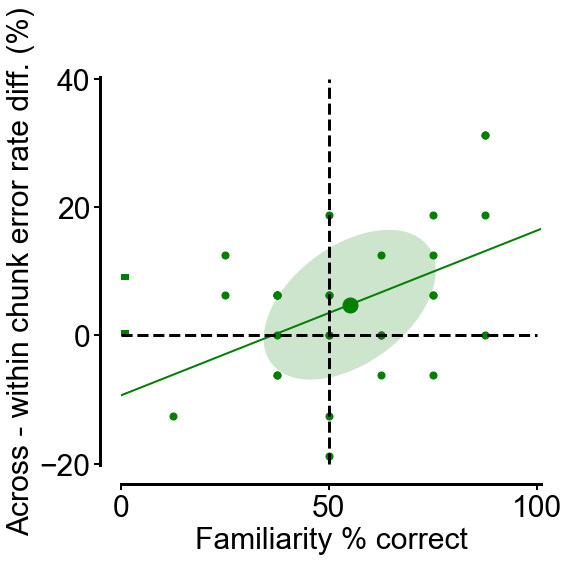

Correlation btw. familiarity and object effect 0.4553548740745591 0.011453856292790837 0.7063960480889815 0.10255523462878216


In [12]:
type_lab = ["m", "r", "c"]
crit=1.96
for fi,f in enumerate(fam_perf):
    d = data_RT_err[1][fi][0]
    pivot = pd.pivot_table(d[d["pair2"]<9], index=['name'], columns=['Code'], values=['error'], aggfunc=[np.mean])
    c = (pivot.values[:,2]-pivot.values[:,1])
    data = [
        [
            [[f[:,0]*100,c*100]]
        ]
    ]
    ScatterForCorrelation(data,
                        SpreadOfX = 0.1,
                        YError = 'CI',
                        NoStd = 1,
                        plotsize = [8,8],
                        axeslimitX = [[0],[100.0000001],[50]],
                        axeslimitY = [[-20],[40.0000001],[20]],
                        axisLabels = [['Familiarity % correct'],['Across - within chunk error rate diff. (%)']],
                        SameAxisLabel = True,
                        ConditionLabels = [],
                        SameConditionLabels = True,
                        SubplotTitles = [''],
                        SameSubplotTitles = False,
                        plotTitle = '',
                        ThresValue = [50,0],
                        SameThresValue = True,
                        RegressionLine = [True],
                        AxisTicks = [[],[]],
                        SameAxisTicks = True,
                        SaveFigName = figpath+'fam_chunk_corr'+type_lab[fi]+'.pdf',
                        Outliers = [],
                        SameErrorEllipseColor = True,
                        ErrorEllipse = {'color':['g','r'],'alpha':0.2},
                        axisTouching = True,
                        ErrorBar = {'ErrDist':[[0.1],[0.2]], 'ErrSize':0.5, 'ErrWid':6, 'sizedots':50, 'sizeMean':20, 'ErrColor':['g','r'], 'DotsColor':['g','r'],'OutlierDotsColor':'r','RegLineWid':2},
                        titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'30'},
                        LegendPos = {'LegendPosition':'upper left'},
                        FigureLayout = [1,1.3,1.8,0.85])

    # computing confidence intervals for the correlations
    r1,p1 = sc.pearsonr(f[:,0],c)
    # CIs in pearson
    r1_CU=np.tanh(np.arctanh(r1)+(1.03/np.sqrt(len(f)-3))*crit)
    r1_CL=np.tanh(np.arctanh(r1)-(1.03/np.sqrt(len(f)-3))*crit)

    print 'Correlation btw. familiarity and object effect', r1,p1,r1_CU,r1_CL
    np.savetxt(filepath+'results/exp1_fam_obj_'+type_lab[fi]+'1.csv',np.vstack(((f[:,0],c))).T)

# Plot for paper - main, rep, controll together

In [13]:
m_err = np.loadtxt(filepath+'results/exp1_obj_err_m.csv')      
m_rt = np.loadtxt(filepath+'results/exp1_obj_rt_m.csv')        
m_avg_err = np.loadtxt(filepath+'results/exp1_avg_err_m.csv')
m_avg_rt = np.loadtxt(filepath+'results/exp1_avg_rt_m.csv')

r_err = np.loadtxt(filepath+'results/exp1_obj_err_r.csv')      
r_rt = np.loadtxt(filepath+'results/exp1_obj_rt_r.csv')        
r_avg_err = np.loadtxt(filepath+'results/exp1_avg_err_r.csv')
r_avg_rt = np.loadtxt(filepath+'results/exp1_avg_rt_r.csv')

c_err = np.loadtxt(filepath+'results/exp1_obj_err_c.csv')      
c_rt = np.loadtxt(filepath+'results/exp1_obj_rt_c.csv')        
c_avg_err = np.loadtxt(filepath+'results/exp1_avg_err_c.csv')
c_avg_rt = np.loadtxt(filepath+'results/exp1_avg_rt_c.csv')

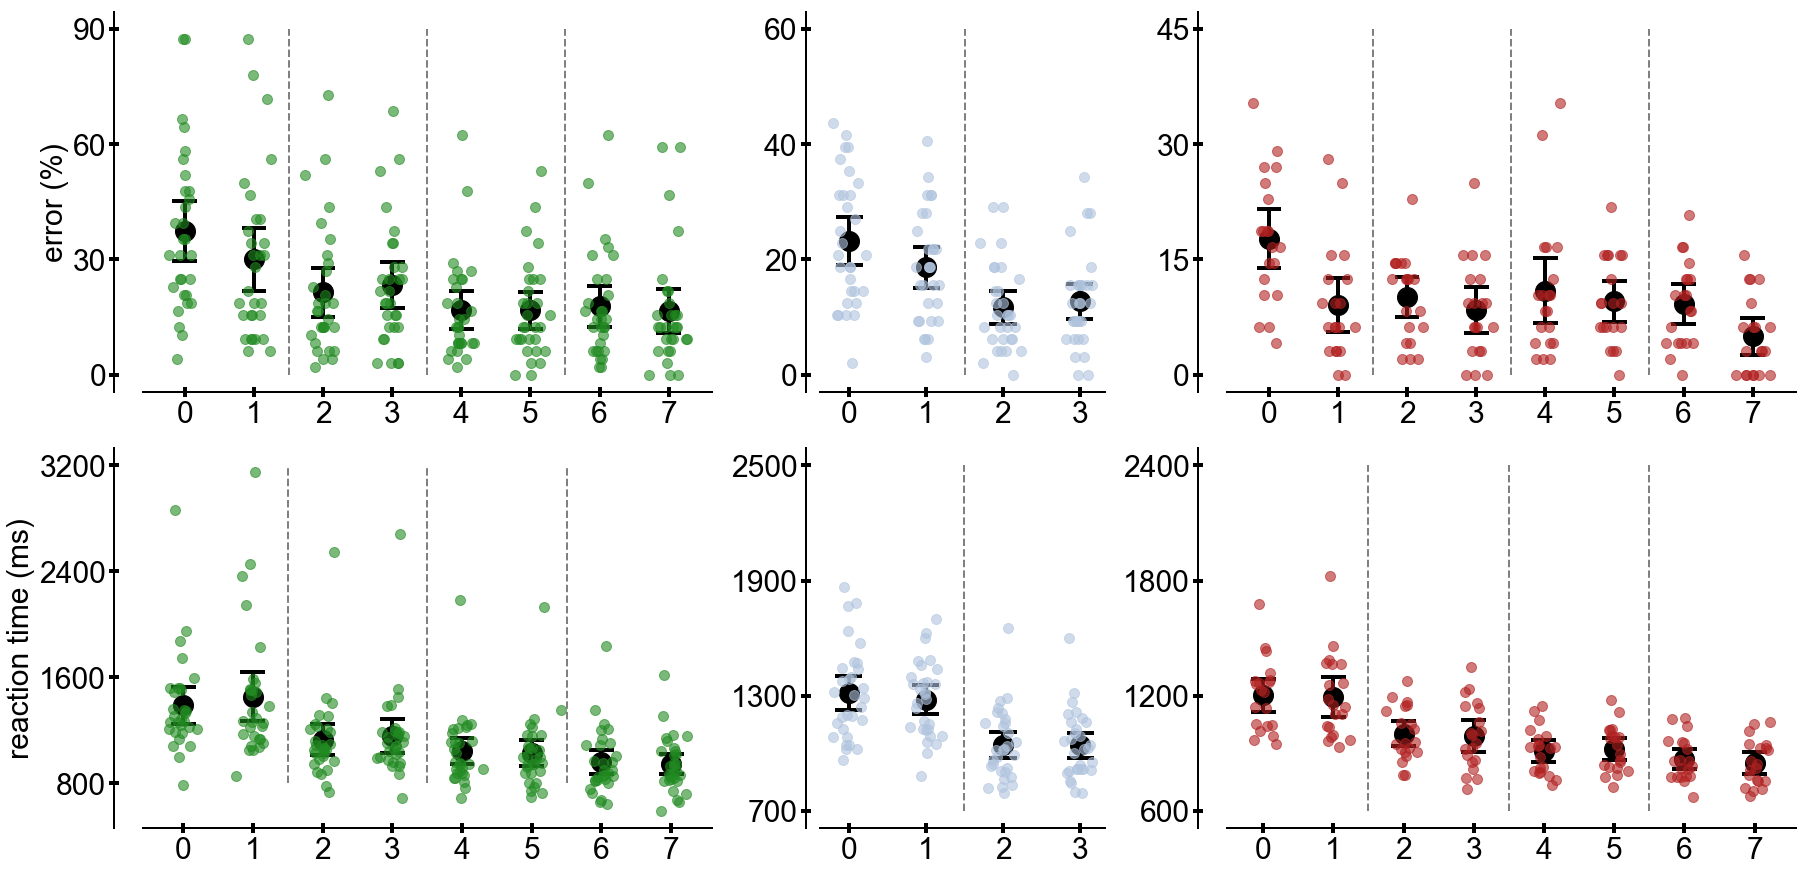

In [14]:
dat = [[m_avg_err,r_avg_err,c_avg_err],
       [m_avg_rt,r_avg_rt,c_avg_rt]]

lw = 6
fig = plt.figure(figsize=(25, 12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=2, figure=fig)

axisFont = {'fontname':'Arial', 'size':'30'}
axisFont2 = {'fontname':'Arial', 'size':'40'}
axisWidth = 2
ErrorBar = {'ErrLen':0.15, 'ErrWid1':4, 'ErrWid2':4, 'sizeMean':20, 'sizedots':10, 'ErrColor':['forestgreen','lightsteelblue','firebrick'], 'DotsColor':'y','DotsTransp':0.6,'OutlierDotsColor':'r'}
SpreadOfX = 0.1
y_t = [[0,30,60,90],[0,20,40,60],[0,15,30,45],
       [800,1600,2400,3200],[700,1300,1900,2500],[600,1200,1800,2400]]

y_l = ['error (%)','reaction time (ms)','Across - within chunk error rate diff. (%)','Across - within chunk RT diff. (ms)']
lbl2 = ['Main - Chunks','Replication - Chunks','Control - Objects']
col_ix = [[0,2,3],[2,3,5]]
x = range(8)
i=0
for ri,r in enumerate(dat):
    for ci,c in enumerate(r):
        
        ax = fig.add_subplot(gs[ri,col_ix[0][ci]:col_ix[1][ci]])

        for d in range(c.shape[1]):

            y = np.mean(c[:,d])

            LowerError = sc.t.interval(0.95, len(c[:,d])-1, loc=np.mean(c[:,d]), scale=sc.sem(c[:,d]))[0]
            UpperError = sc.t.interval(0.95, len(c[:,d])-1, loc=np.mean(c[:,d]), scale=sc.sem(c[:,d]))[1]

#             ax.plot([x[d],x[d]],[LowerError,UpperError], '-', color = ErrorBar['ErrColor'][ci], linewidth=ErrorBar['ErrWid1'])
#             ax.plot([x[d]-ErrorBar['ErrLen'],x[d]+ErrorBar['ErrLen']],[UpperError,UpperError],  '-', color = ErrorBar['ErrColor'][ci], linewidth=ErrorBar['ErrWid2'])
#             ax.plot([x[d]-ErrorBar['ErrLen'],x[d]+ErrorBar['ErrLen']],[LowerError,LowerError],  '-', color = ErrorBar['ErrColor'][ci], linewidth=ErrorBar['ErrWid2'])
#             ax.plot(x[d],y,"o", color = ErrorBar['ErrColor'][ci], markersize=ErrorBar['sizeMean'])
            ax.plot([x[d],x[d]],[LowerError,UpperError], '-', color = 'k', linewidth=ErrorBar['ErrWid1'])
            ax.plot([x[d]-ErrorBar['ErrLen'],x[d]+ErrorBar['ErrLen']],[UpperError,UpperError],  '-', color = 'k', linewidth=ErrorBar['ErrWid2'])
            ax.plot([x[d]-ErrorBar['ErrLen'],x[d]+ErrorBar['ErrLen']],[LowerError,LowerError],  '-', color = 'k', linewidth=ErrorBar['ErrWid2'])
            ax.plot(x[d],y,"o", color ='k', markersize=ErrorBar['sizeMean'])
            ax.plot(np.random.normal(loc=x[d], scale=SpreadOfX, size=len(c[:,d])),c[:,d],"o", color = ErrorBar['ErrColor'][ci], markersize=ErrorBar['sizedots'], alpha=ErrorBar['DotsTransp'])

        if i in [1,4]:
            ax.plot([1.5,1.5],[y_t[i][0],y_t[i][-1]],'--',color = 'gray',linewidth=2)
        else:
            ax.plot([1.5,1.5],[y_t[i][0],y_t[i][-1]],'--',color = 'gray',linewidth=2)
            ax.plot([3.5,3.5],[y_t[i][0],y_t[i][-1]],'--',color = 'gray',linewidth=2)
            ax.plot([5.5,5.5],[y_t[i][0],y_t[i][-1]],'--',color = 'gray',linewidth=2)
            
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_linewidth(axisWidth)
        ax.xaxis.set_ticks_position('bottom')
        rot = 90
        pd = 7
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(axisWidth)
        ax.yaxis.set_ticks_position('left')
        ax.spines['left'].set_position(('axes', -0.05))
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontname(axisFont['fontname'])
            label.set_fontsize(axisFont['size'])
        ax.tick_params('x', length=10, width=4, which='major',direction='inout')
        ax.tick_params('y', length=10, width=4, which='major',direction='inout')
        if i in [0,3]:
            ax.set_ylabel(y_l[ri], **axisFont)
        ax.xaxis.set_ticks(x[:c.shape[1]])
        ax.yaxis.set_ticks(y_t[i])
        
#         if (i>5):
#             ax.xaxis.set_ticklabels(l_d[0])
#         elif (i==1) or (i==4):
#             ax.xaxis.set_ticklabels(l_d[1])
#         else:
#             ax.xaxis.set_ticklabels(l_d[2])
#         if i<3:
#             ax.set_title(lbl2[ci], **axisFont2)
        i=i+1
        
plt.savefig(figpath+'exp1_plot_avg_rt_err.pdf')
plt.show()

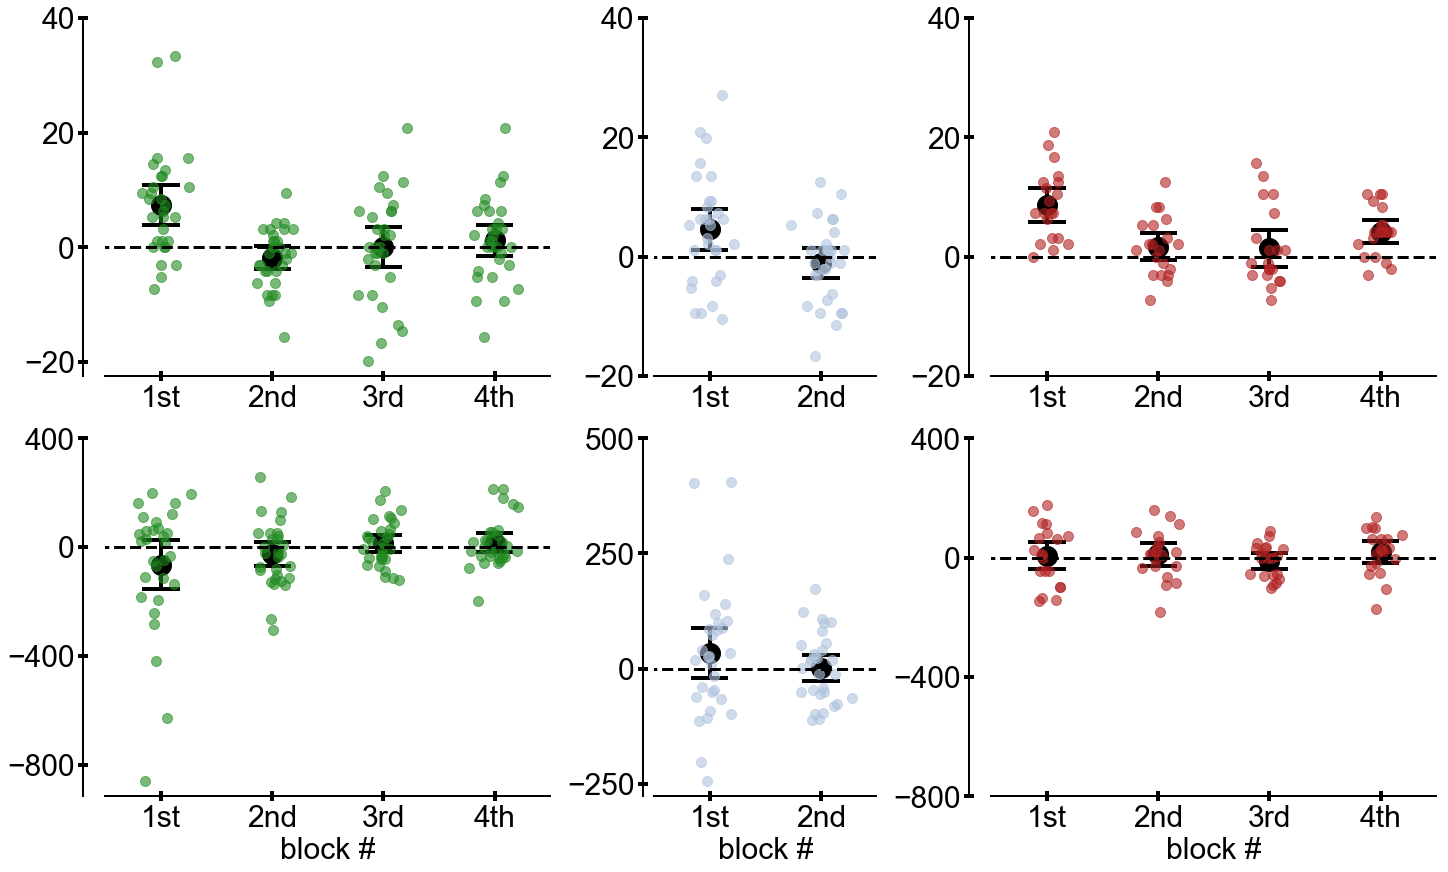

In [15]:
dat = [[m_err,r_err,c_err],
       [m_rt,r_rt,c_rt]]

lw = 6
fig = plt.figure(figsize=(20, 12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=2, figure=fig)

axisFont = {'fontname':'Arial', 'size':'30'}
axisFont2 = {'fontname':'Arial', 'size':'40'}
axisWidth = 2
ErrorBar = {'ErrLen':0.15, 'ErrWid1':4, 'ErrWid2':4, 'sizeMean':20, 'sizedots':10, 'ErrColor':['forestgreen','lightsteelblue','firebrick'], 'DotsColor':'y','DotsTransp':0.6,'OutlierDotsColor':'r'}
SpreadOfX = 0.1
y_t = [[-20,0,20,40],[-20,0,20,40],[-20,0,20,40],
       [-800,-400,0,400],[-250,0,250,500],[-800,-400,0,400]]

y_l = ['Across - within chunk error rate diff. (%)','Across - within chunk RT diff. (ms)']
lbl2 = ['Main - Chunks','Replication - Chunks','Control - Objects']
l_d = [['1st','2nd'],['1st','2nd','3rd','4th']]
col_ix = [[0,2,3],[2,3,5]]
x = range(8)
i=0
for ri,r in enumerate(dat):
    for ci,c in enumerate(r):
        
        ax = fig.add_subplot(gs[ri,col_ix[0][ci]:col_ix[1][ci]])

        for d in range(c.shape[1]):

            y = np.mean(c[:,d])

            LowerError = sc.t.interval(0.95, len(c[:,d])-1, loc=np.mean(c[:,d]), scale=sc.sem(c[:,d]))[0]
            UpperError = sc.t.interval(0.95, len(c[:,d])-1, loc=np.mean(c[:,d]), scale=sc.sem(c[:,d]))[1]

#             ax.plot([x[d],x[d]],[LowerError,UpperError], '-', color = ErrorBar['ErrColor'][ci], linewidth=ErrorBar['ErrWid1'])
#             ax.plot([x[d]-ErrorBar['ErrLen'],x[d]+ErrorBar['ErrLen']],[UpperError,UpperError],  '-', color = ErrorBar['ErrColor'][ci], linewidth=ErrorBar['ErrWid2'])
#             ax.plot([x[d]-ErrorBar['ErrLen'],x[d]+ErrorBar['ErrLen']],[LowerError,LowerError],  '-', color = ErrorBar['ErrColor'][ci], linewidth=ErrorBar['ErrWid2'])
#             ax.plot(x[d],y,"o", color = ErrorBar['ErrColor'][ci], markersize=ErrorBar['sizeMean'])
            ax.plot([x[d],x[d]],[LowerError,UpperError], '-', color = 'k', linewidth=ErrorBar['ErrWid1'])
            ax.plot([x[d]-ErrorBar['ErrLen'],x[d]+ErrorBar['ErrLen']],[UpperError,UpperError],  '-', color = 'k', linewidth=ErrorBar['ErrWid2'])
            ax.plot([x[d]-ErrorBar['ErrLen'],x[d]+ErrorBar['ErrLen']],[LowerError,LowerError],  '-', color = 'k', linewidth=ErrorBar['ErrWid2'])
            ax.plot(x[d],y,"o", color ='k', markersize=ErrorBar['sizeMean'])
            ax.plot(np.random.normal(loc=x[d], scale=SpreadOfX, size=len(c[:,d])),c[:,d],"o", color = ErrorBar['ErrColor'][ci], markersize=ErrorBar['sizedots'], alpha=ErrorBar['DotsTransp'])

        ax.plot([-1,4],[0,0],'k--',linewidth=3)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_linewidth(axisWidth)
        ax.xaxis.set_ticks_position('bottom')
        rot = 90
        pd = 7
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(axisWidth)
        ax.yaxis.set_ticks_position('left')
        ax.spines['left'].set_position(('axes', -0.05))
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontname(axisFont['fontname'])
            label.set_fontsize(axisFont['size'])
        ax.tick_params('x', length=10, width=4, which='major',direction='inout')
        ax.tick_params('y', length=10, width=4, which='major',direction='inout')
        if i in [3,4,5]:
            ax.set_xlabel('block #', **axisFont)
        ax.xaxis.set_ticks(x[:c.shape[1]])
        ax.yaxis.set_ticks(y_t[i])
        if (i==1) or (i==4):
            ax.set_xlim([-.5,1.5])
            ax.xaxis.set_ticklabels(l_d[0])
        else:
            ax.set_xlim([-.5,3.5])
            ax.xaxis.set_ticklabels(l_d[1])
#         if (i>5):
#             ax.xaxis.set_ticklabels(l_d[0])
#         elif (i==1) or (i==4):
#             ax.xaxis.set_ticklabels(l_d[1])
#         else:
#             ax.xaxis.set_ticklabels(l_d[2])
#         if i<3:
#             ax.set_title(lbl2[ci], **axisFont2)
        i=i+1
        
plt.savefig(figpath+'exp1_plot_obj_rt_err.pdf')
plt.show()